In [1]:
import gym
import tensorflow as tf
import numpy as np
import os
import time

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from multiprocessing import Process
from rl_utils import PolicyGradient, run_rollouts, render_NOerrors, args_jupyter, wrapper

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Imports specifically so we can render outputs in Jupyter.
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display
    
def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    session = tf.Session(config=config)
    return session

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=25)
    display(display_animation(anim, default_mode='loop'))

/mnt/f/Awesome/cs294-linux/.env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
n_experiments = 4
initial_seed = 0
argumentitos = {
    'exp_name': 'first_try',
    'env_name': "CartPole-v0",
    'n_iter': 100,
    'batch_size': 1000,
    # 'nn_baseline': True
}

# Create the logdir
if not(os.path.exists('data')):
    os.makedirs('data')
logdir = argumentitos.get('exp_name', 'vpg') + '_' + argumentitos.get('env_name') + '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
logdir = os.path.join('data', logdir)
if not(os.path.exists(logdir)):
    os.makedirs(logdir)
print(logdir)

processes = []

for e in range(n_experiments):
    seed = initial_seed + 10*e
    # print(seed)
    # print(type(seed))
    parsed_args = args_jupyter(argumentitos, seed)
    def train_func():
        wrapper(parsed_args, logdir)
    
    p = Process(target=train_func, args=tuple())
    p.start()
    processes.append(p)

for i in processes:
    p.join()

print('finished :3')

data/first_try_CartPole-v0_27-05-2018_16-10-52
Logging data to data/first_try_CartPole-v0_27-05-2018_16-10-52/0/log.txt
Logging data to data/first_try_CartPole-v0_27-05-2018_16-10-52/10/log.txt
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Logging data to data/first_try_CartPole-v0_27-05-2018_16-10-52/20/log.txt
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Logging data to data/first_try_CartPole-v0_27-05-2018_16-10-52/30/log.txt
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
46
44
********** Iteration 1 ************
54
51
********** Iteration 1 ************
********** Iteration 1 ************
********** Iteration 1 ************
40
********** Iteration 2 ************
49
********** Iteration 2 ************
47
********** Iteration 2 **

6
********** Iteration 49 ************
6
********** Iteration 50 ************
7
********** Iteration 49 ************
6
********** Iteration 50 ************
6
********** Iteration 50 ************
7
********** Iteration 51 ************
7
********** Iteration 50 ************
7
********** Iteration 51 ************
6
********** Iteration 51 ************
6
********** Iteration 52 ************
6
********** Iteration 51 ************
6
********** Iteration 52 ************
6
********** Iteration 52 ************
6
********** Iteration 53 ************
8
********** Iteration 52 ************
6
********** Iteration 53 ************
6
********** Iteration 53 ************
6
********** Iteration 54 ************
7
********** Iteration 53 ************
6
********** Iteration 54 ************
7
********** Iteration 54 ************
6
********** Iteration 55 ************
6
********** Iteration 54 ************
6
********** Iteration 55 ************
6
********** Iteration 55 ************
6
********** Iteration 56

In [30]:
exp_name = 'test'
env_name = 'CartPole-v0'

if not(os.path.exists('data')):
    os.makedirs('data')
logdir = exp_name + '_' + env_name + '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
logdir = os.path.join('data', logdir)
if not(os.path.exists(logdir)):
    os.makedirs(logdir)

max_path_length = None

tf.reset_default_graph()
PG = PolicyGradient(n_iter=100, logdir=os.path.join(logdir, '%d'%1))

CartPole-v0
Logging data to data/test_CartPole-v0_25-05-2018_02-07-51/1/log.txt
still no errors
0
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
O:


In [ ]:
# tf.global_variables_initializer()
frames = PG.train(print_console=False)


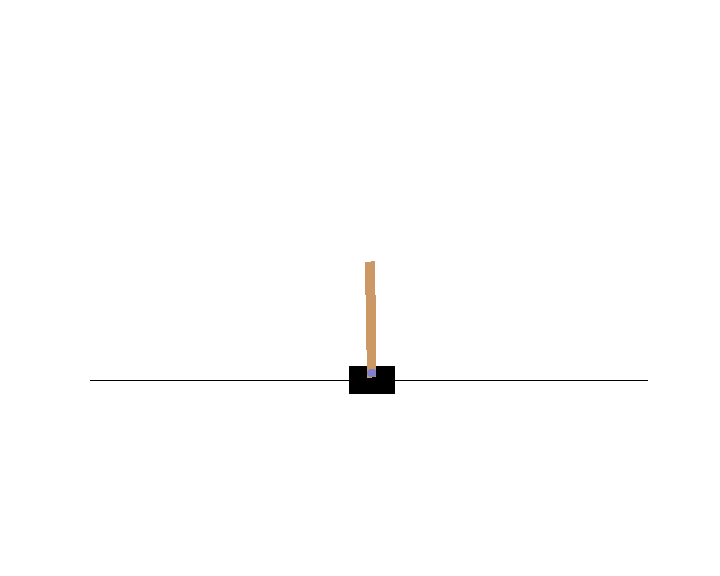
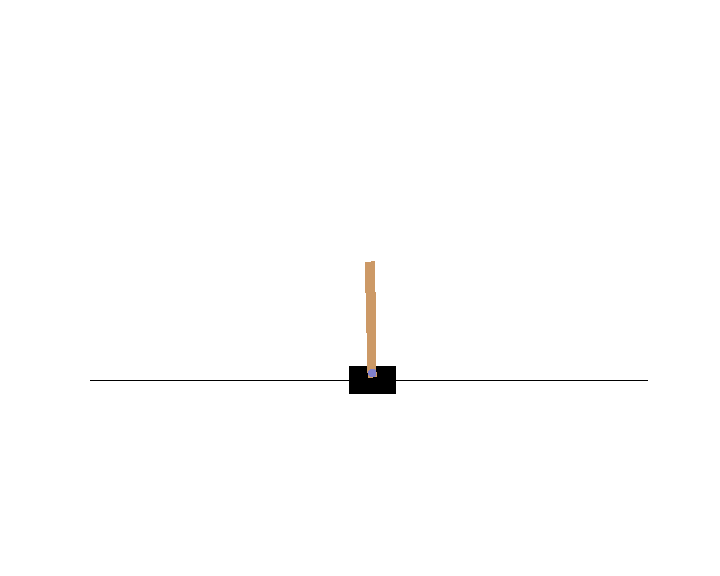
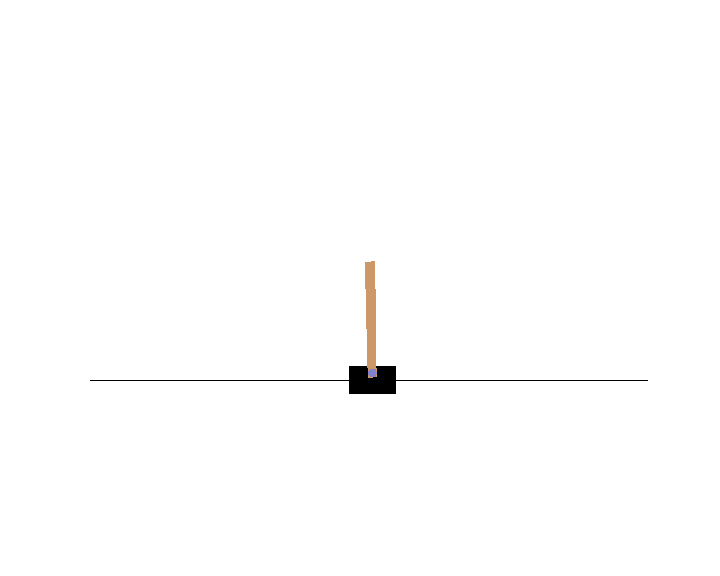
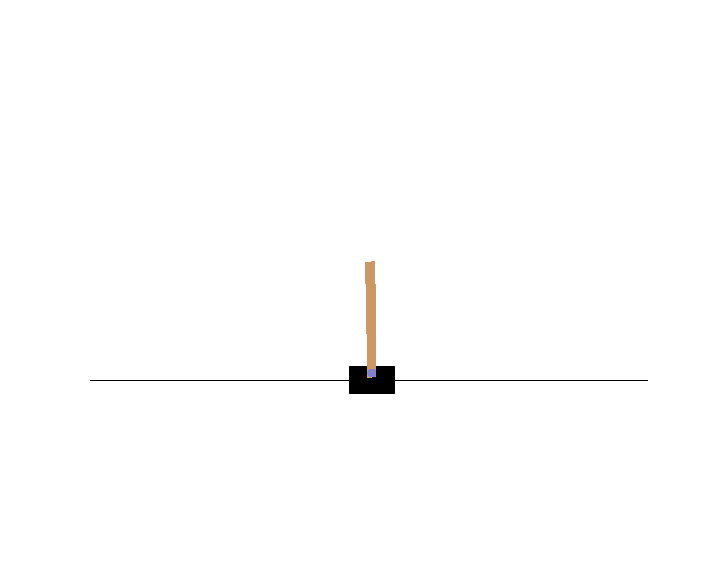
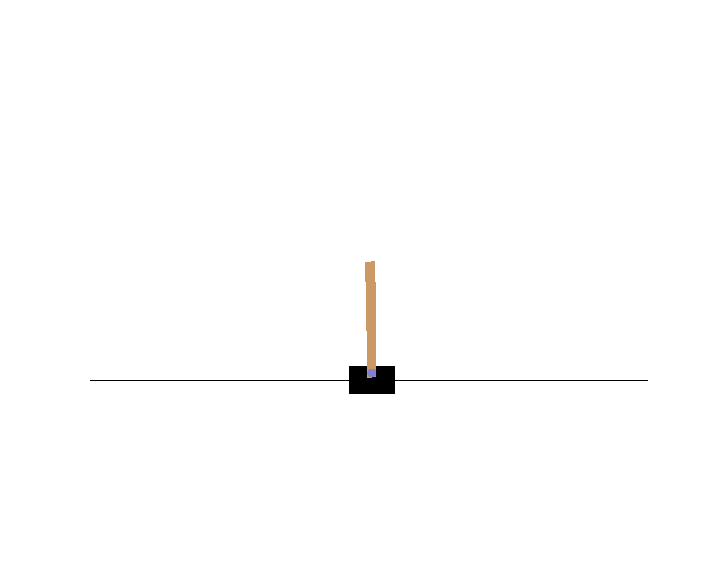
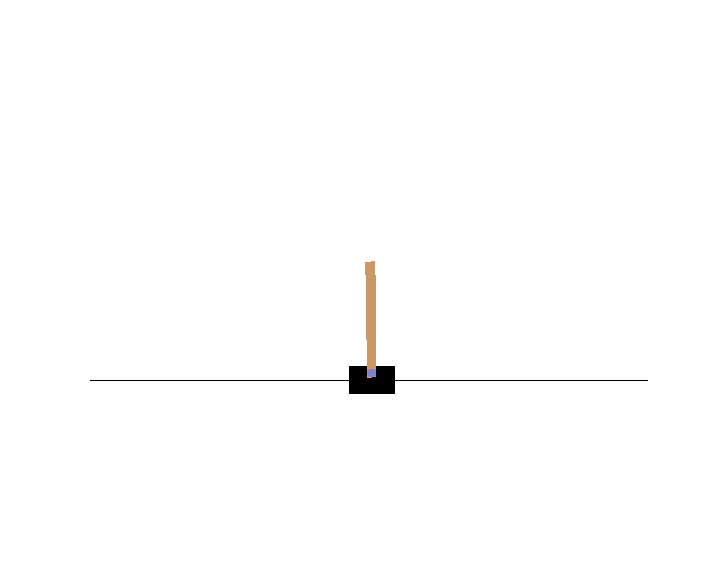
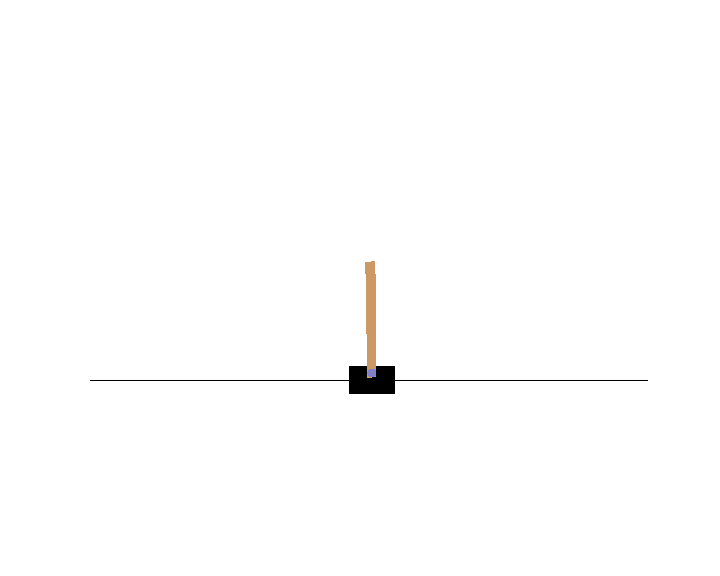
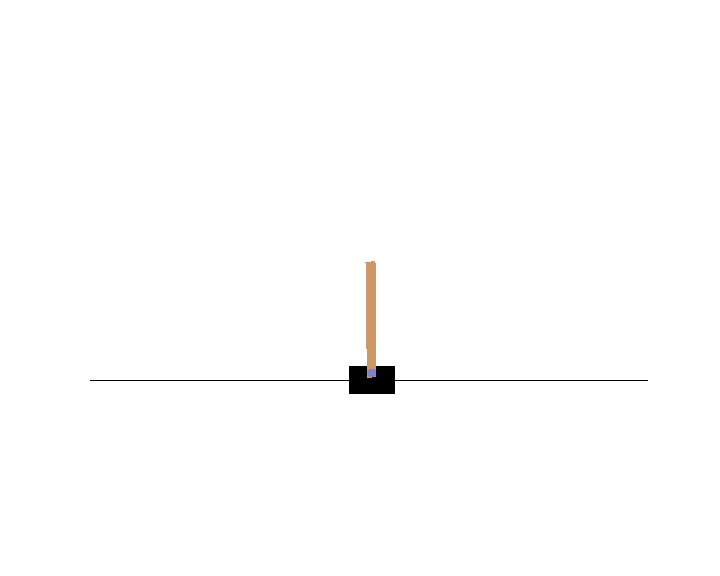
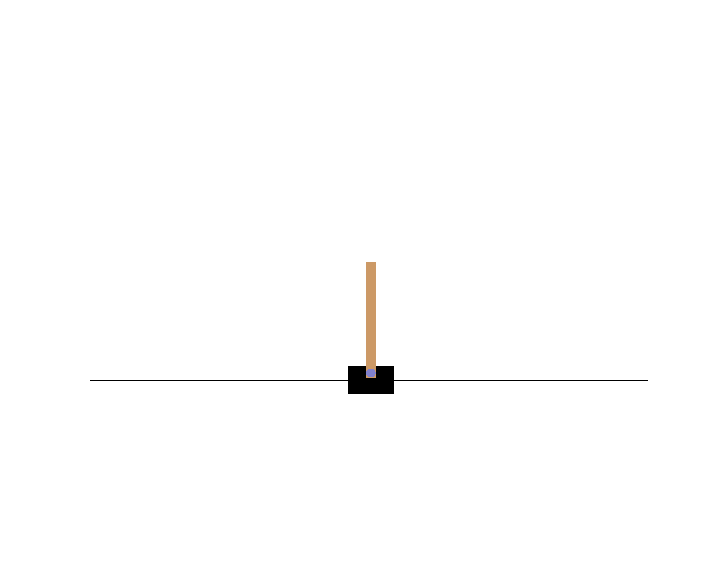
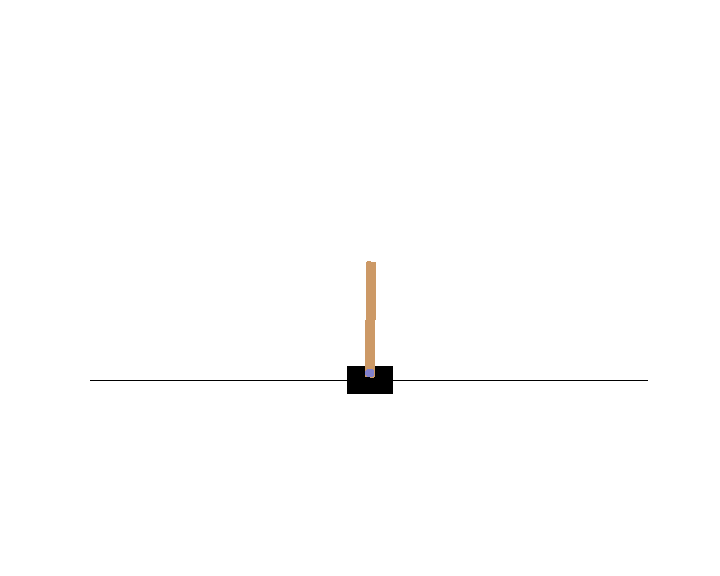
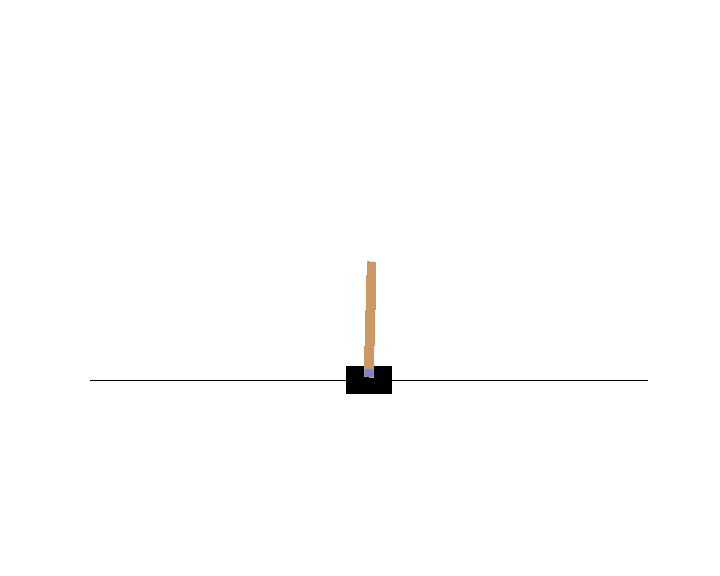
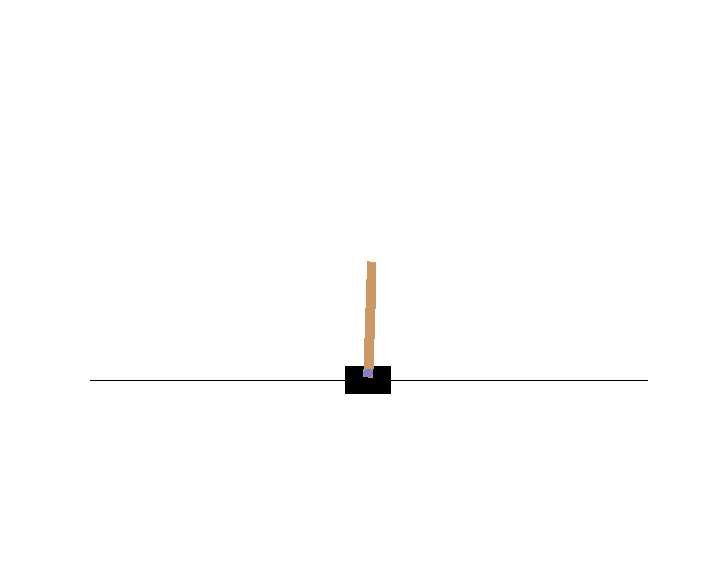
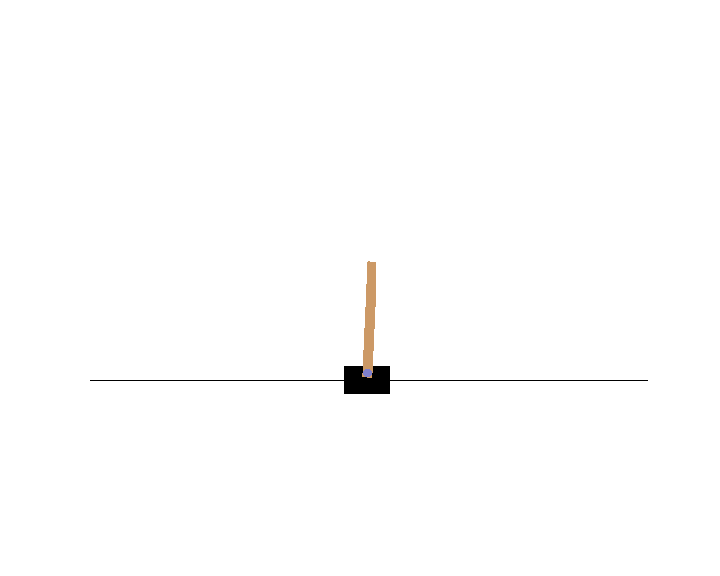
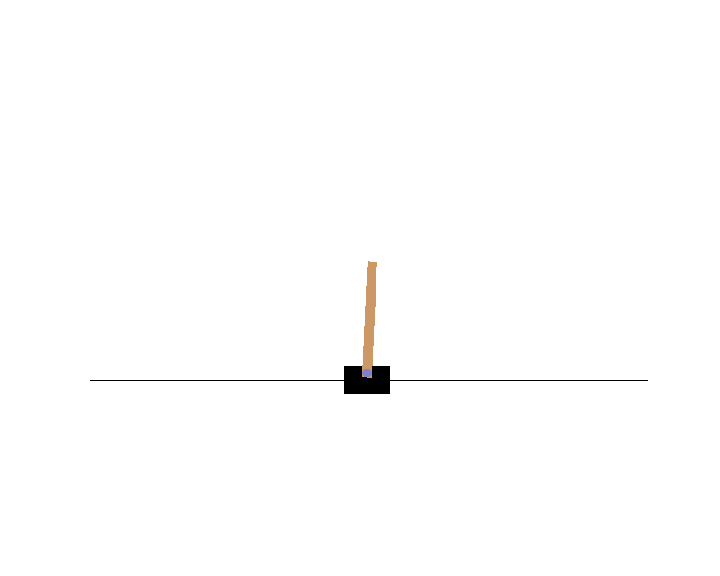
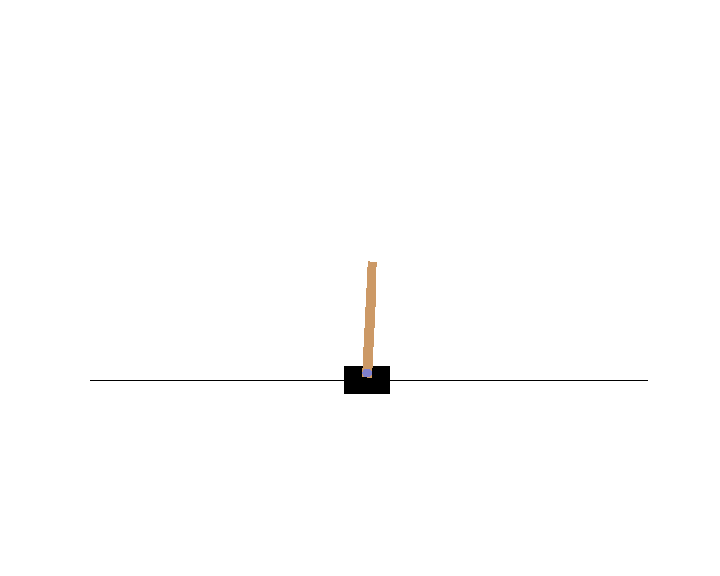
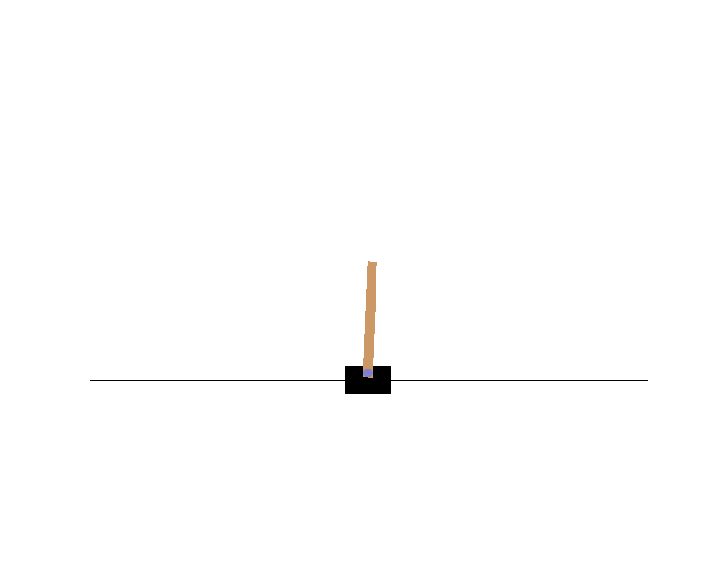
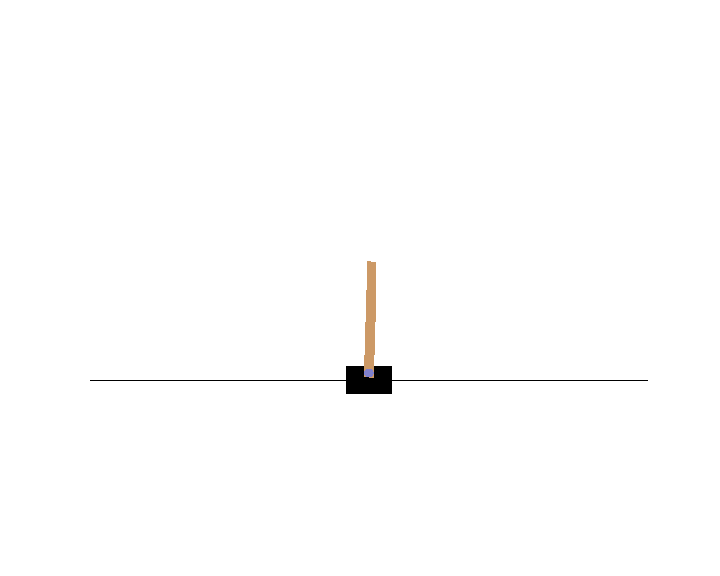
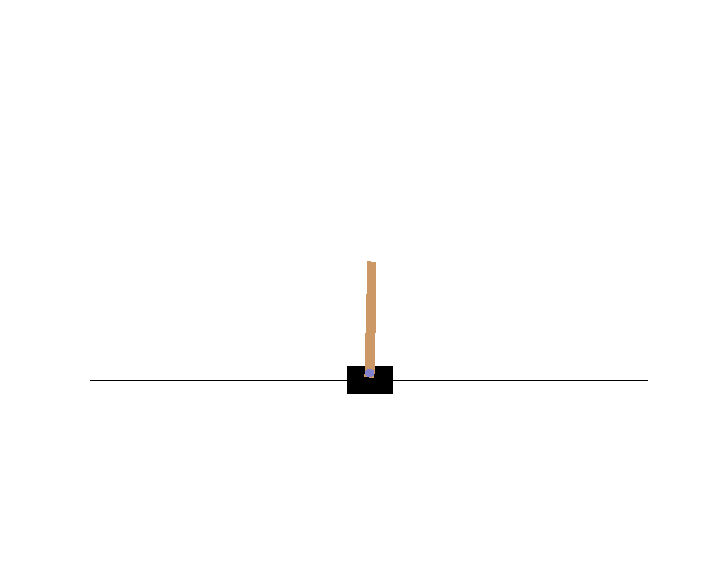
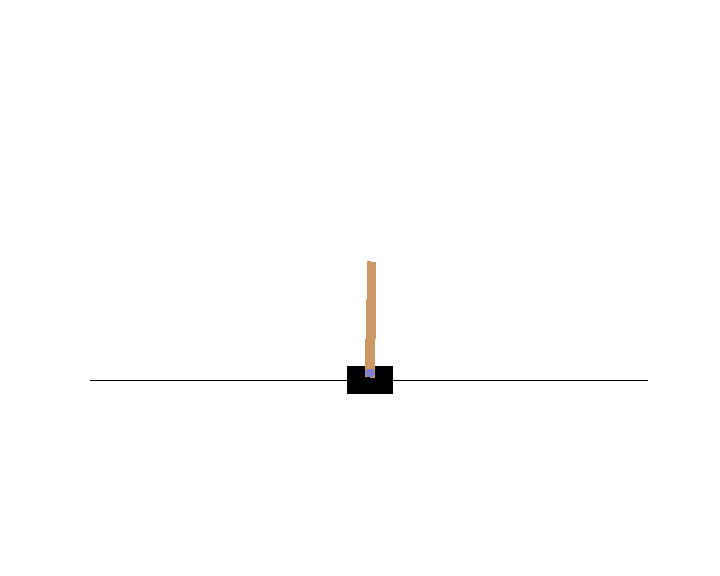
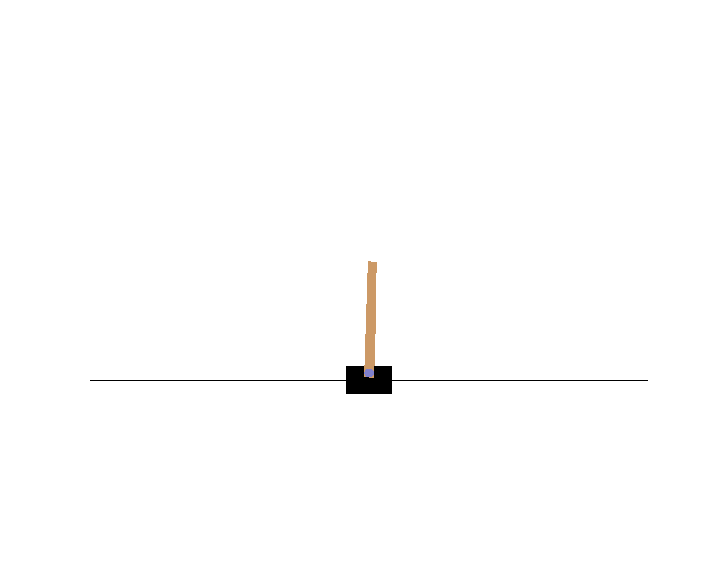
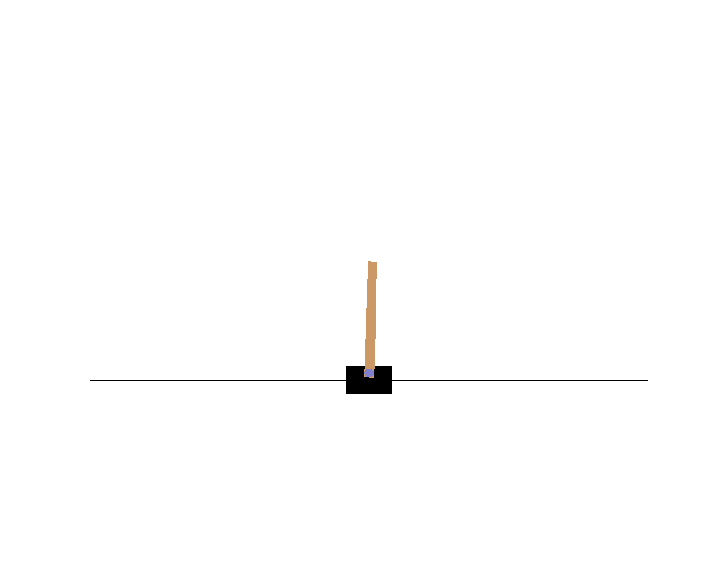
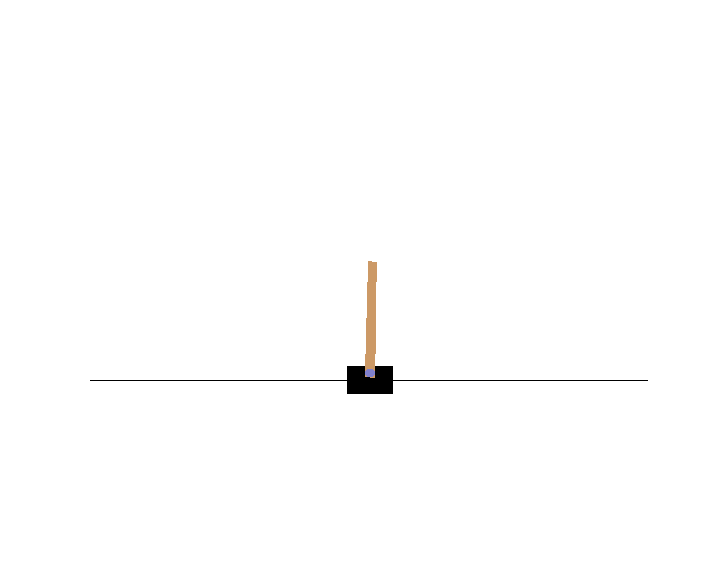
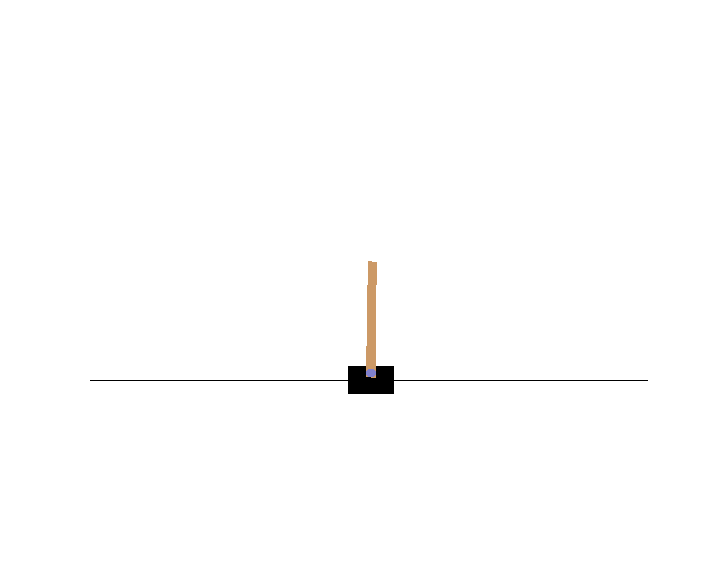
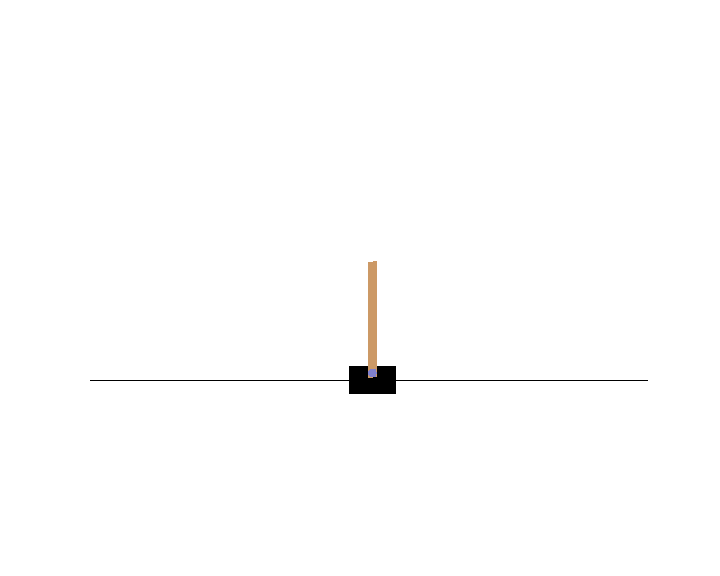
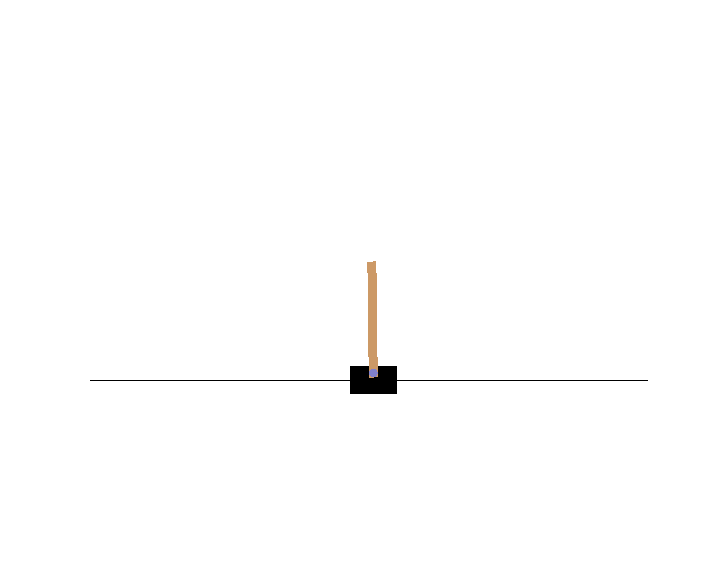
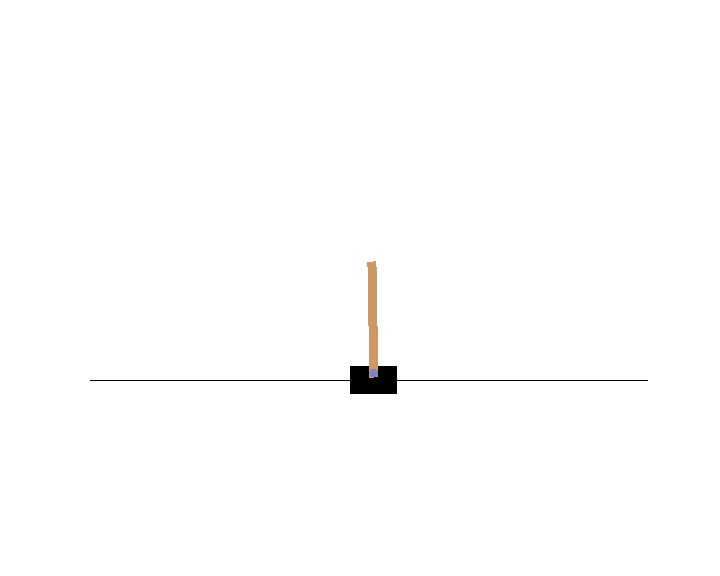
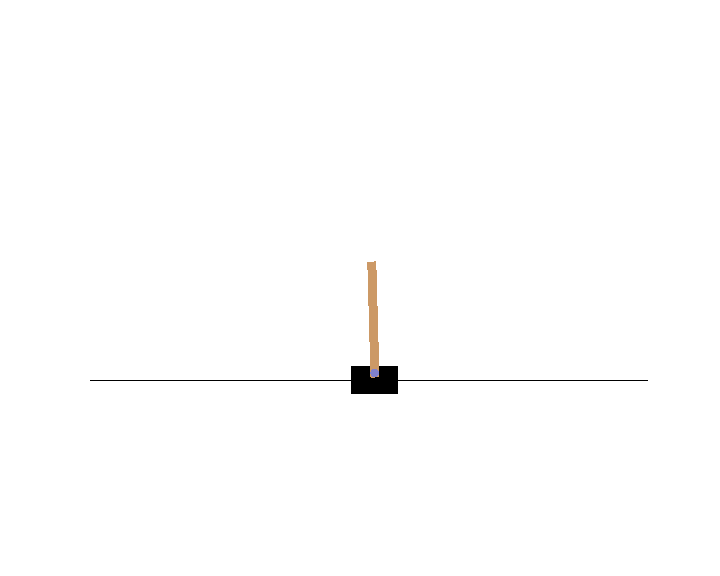
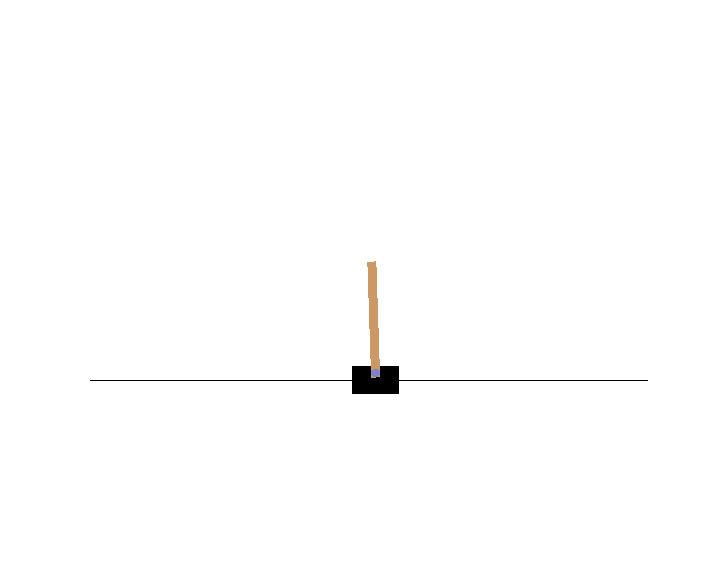
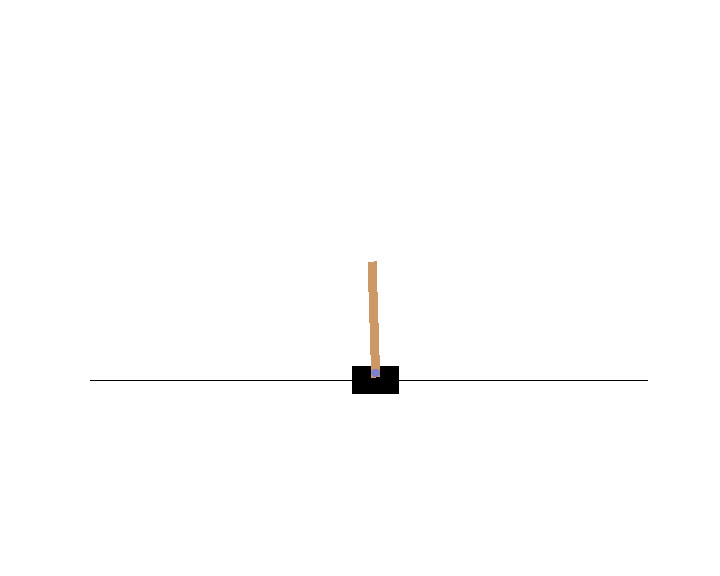
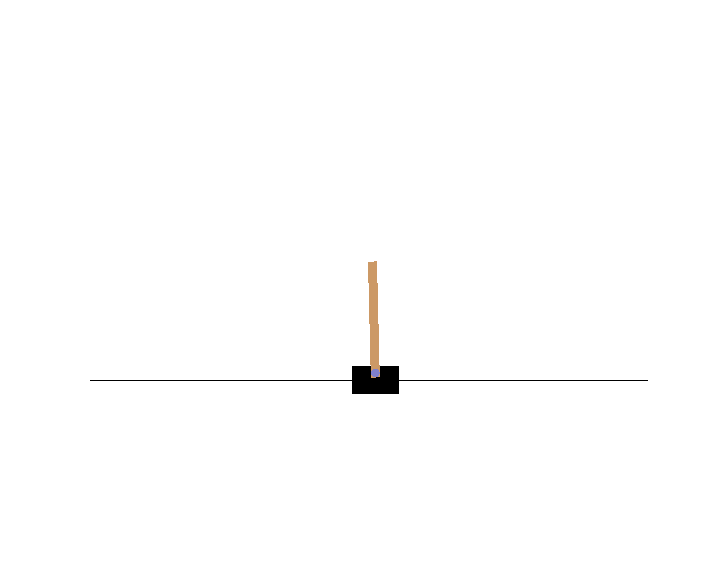
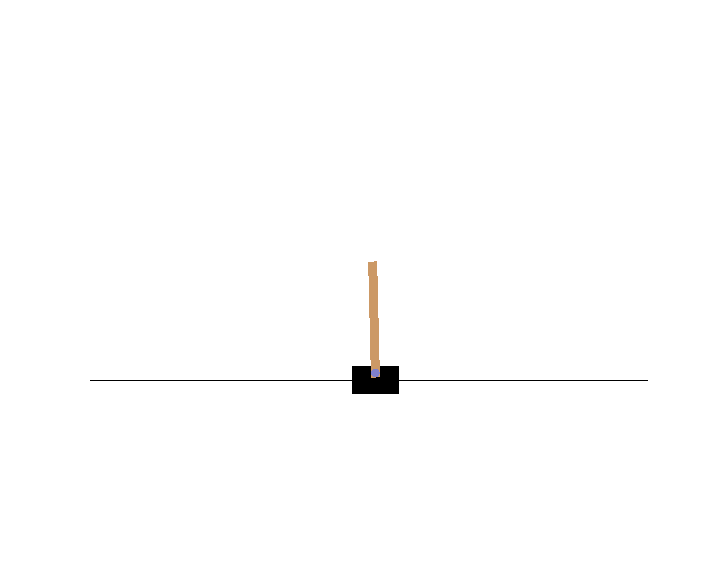
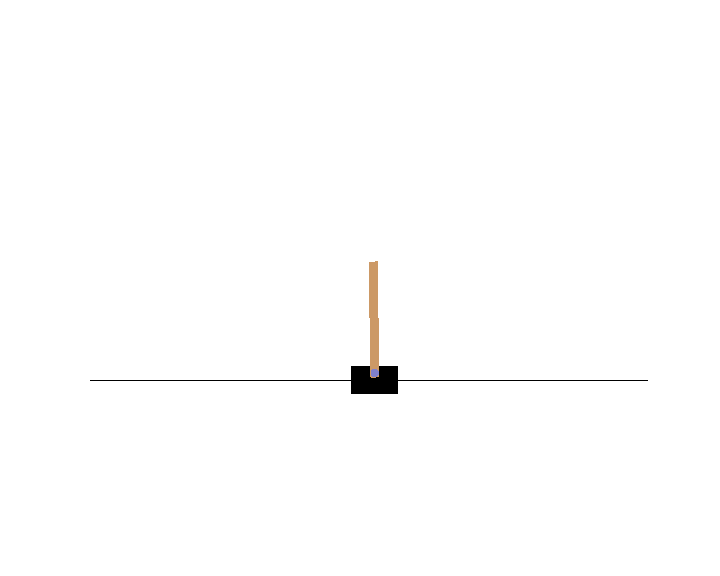
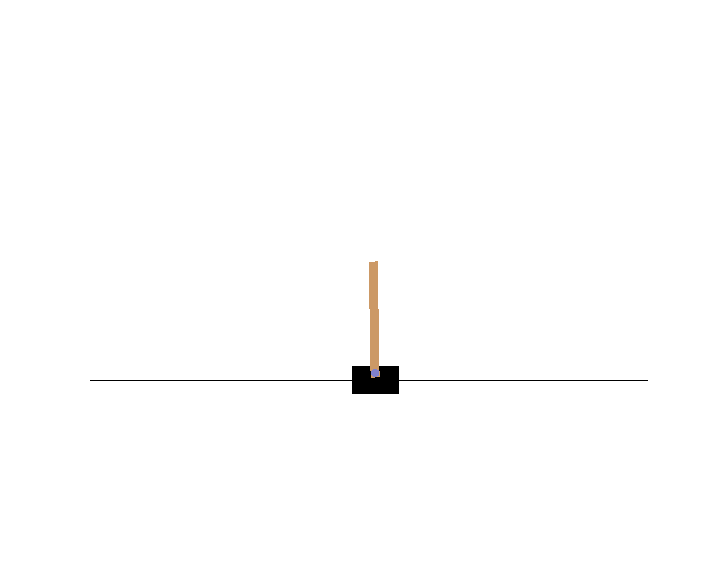
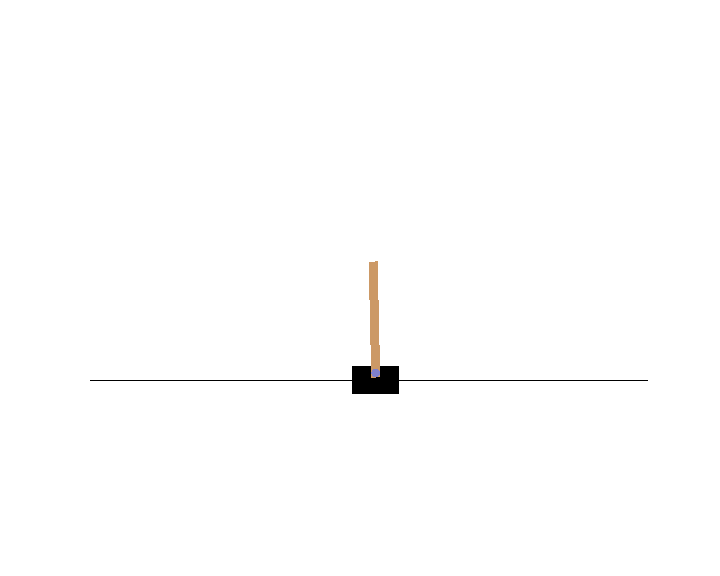
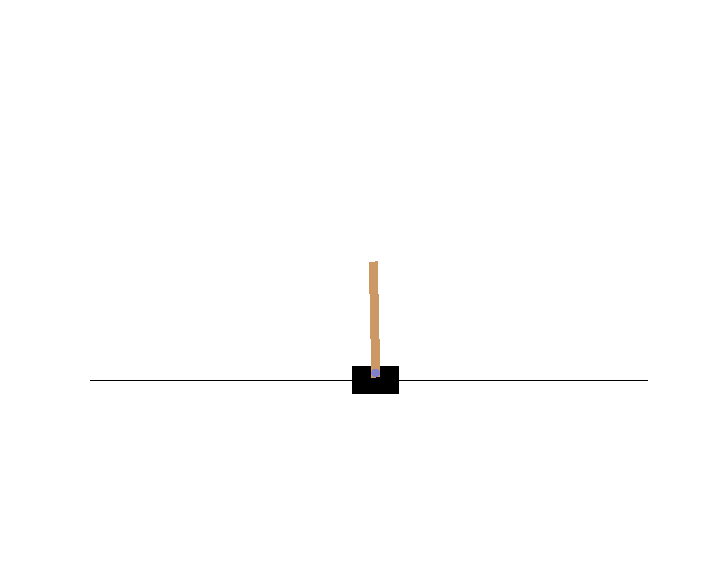
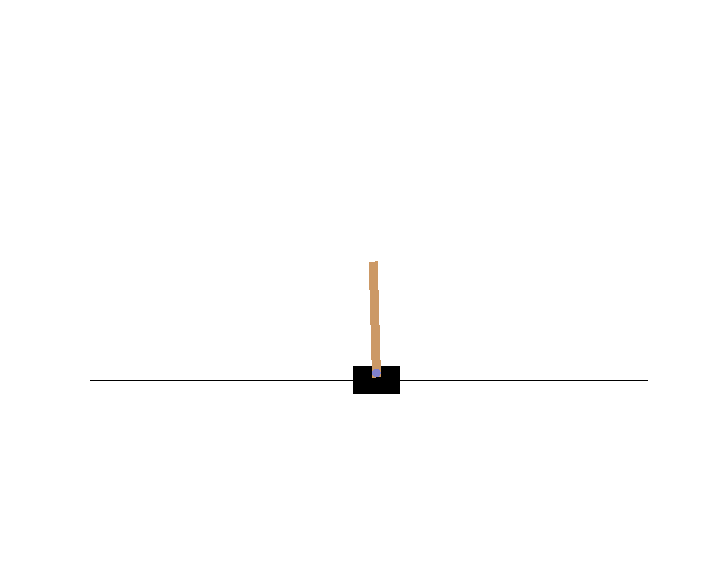
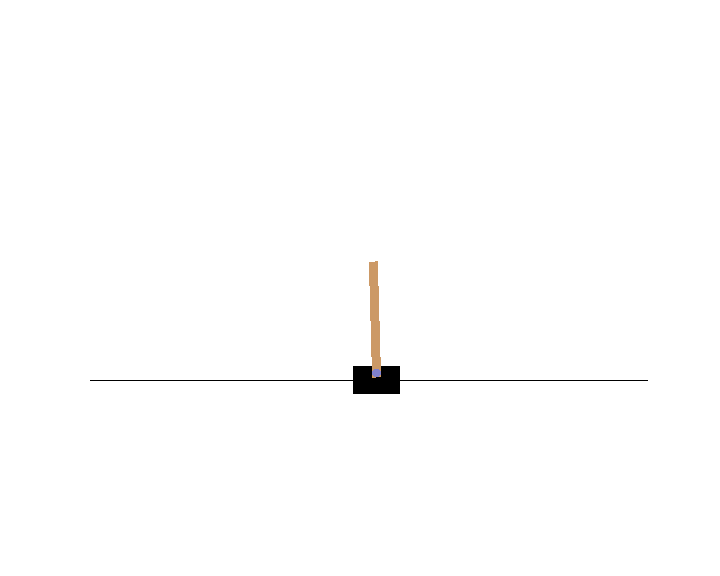
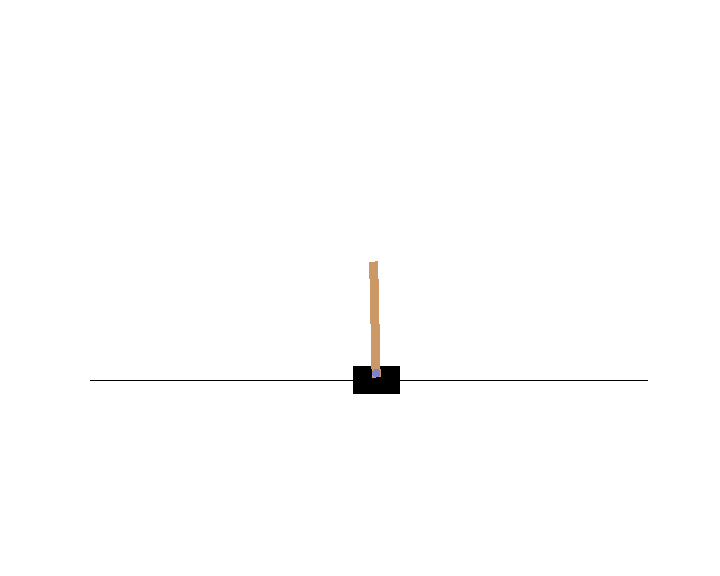
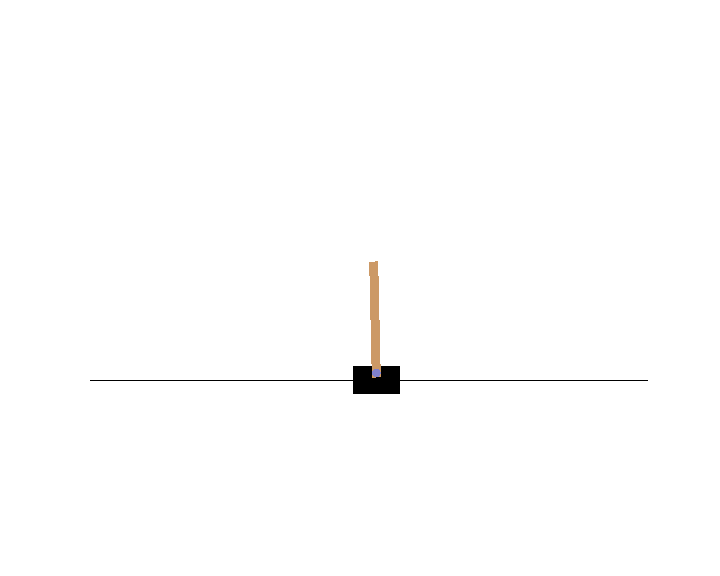
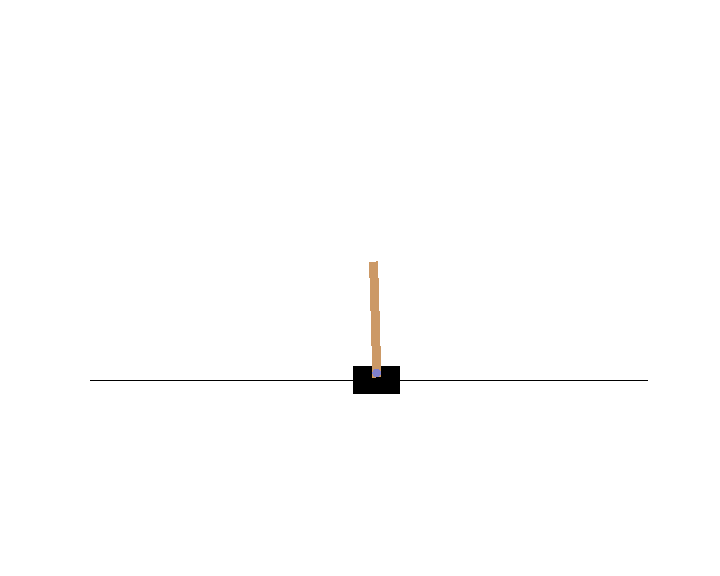
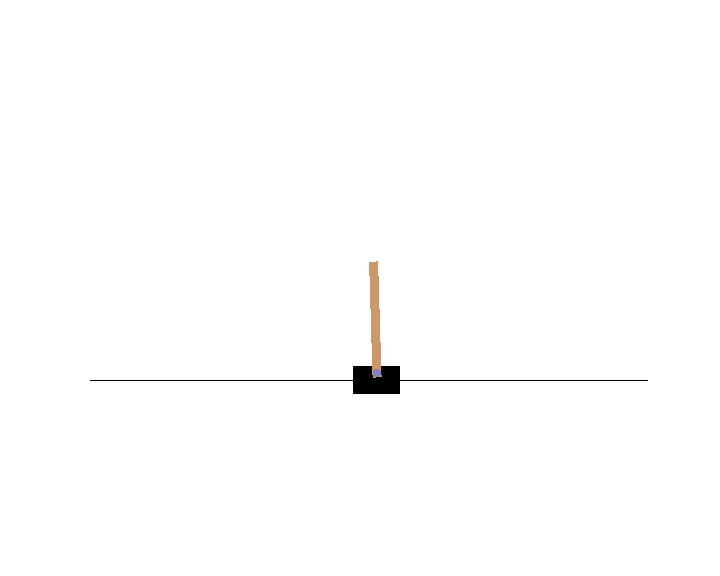
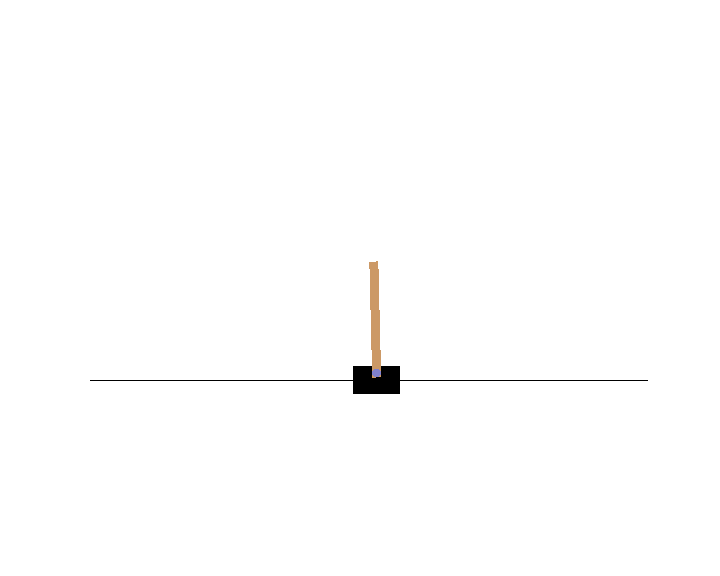
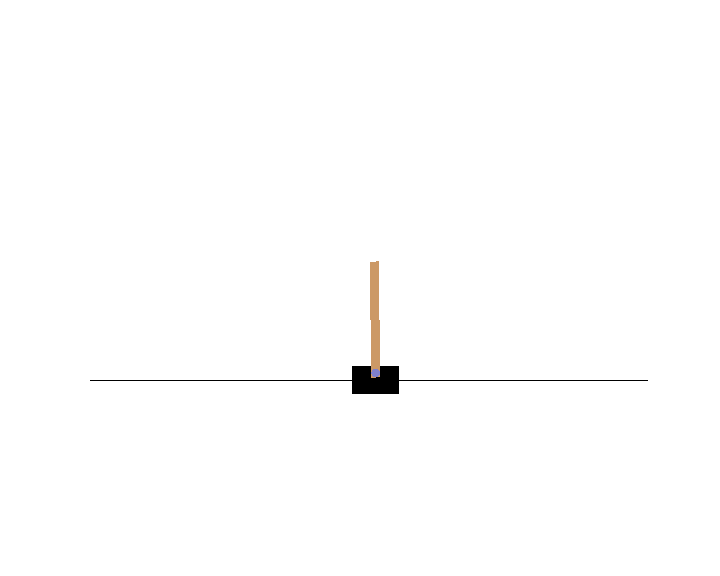
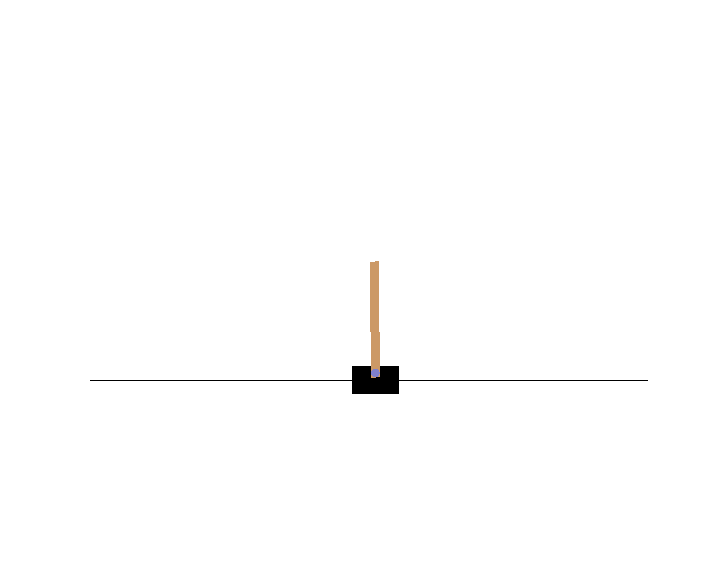
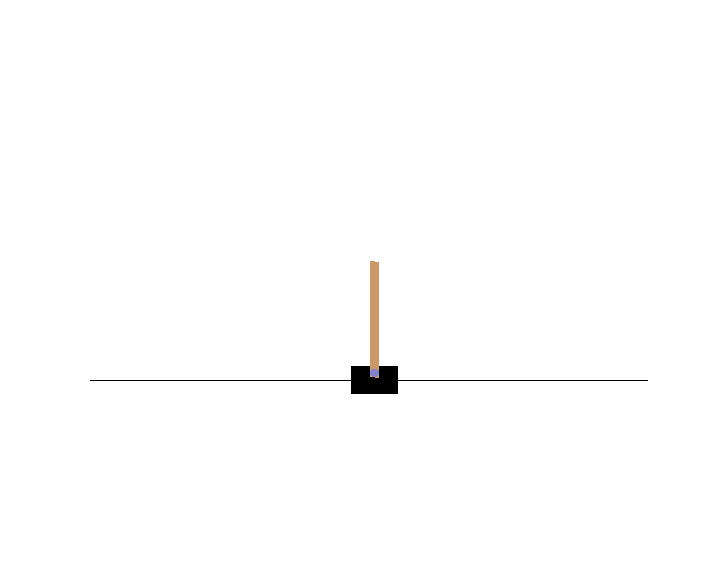
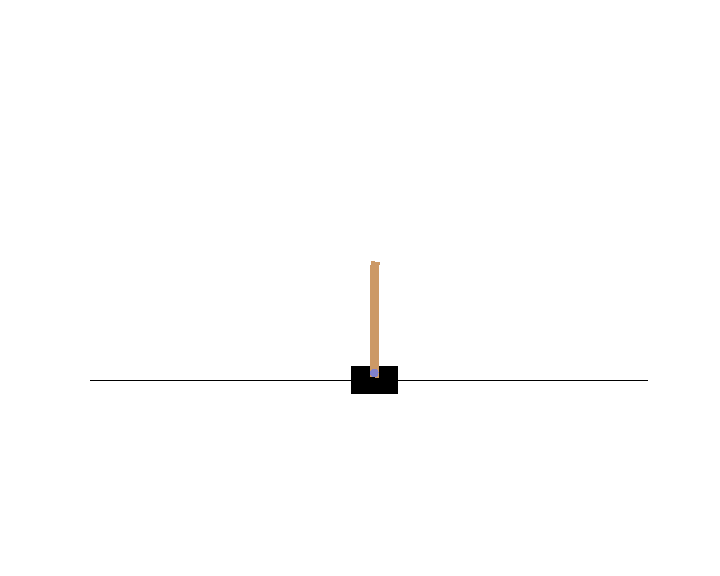
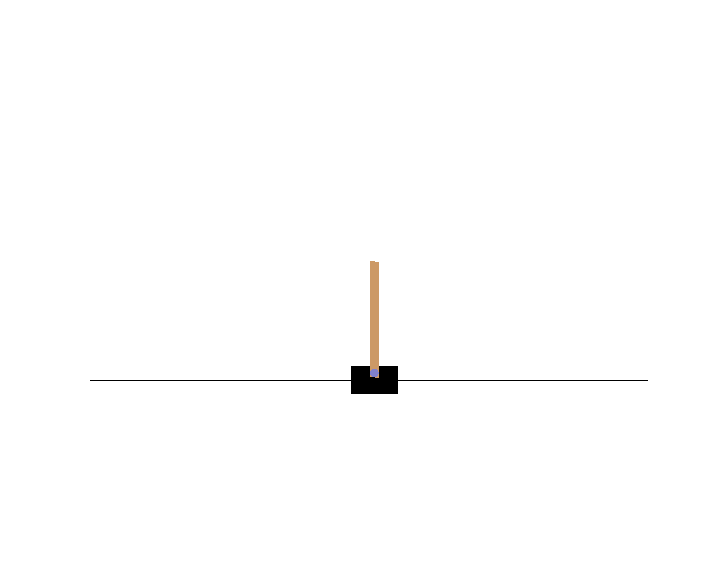
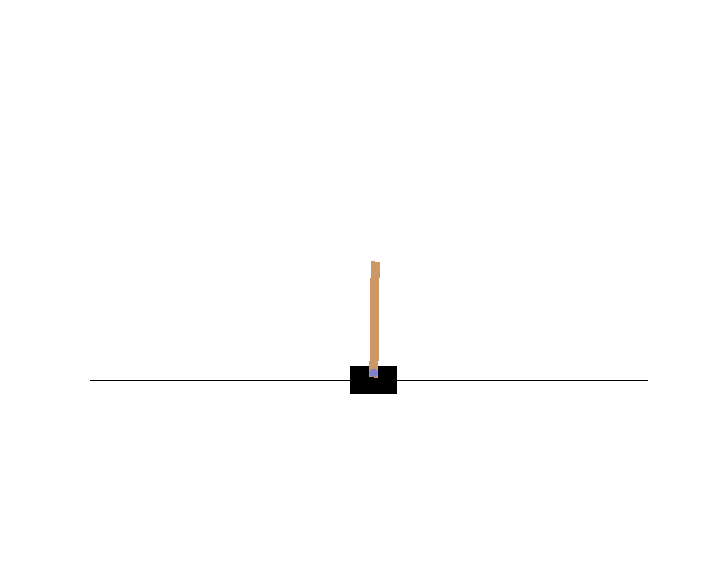
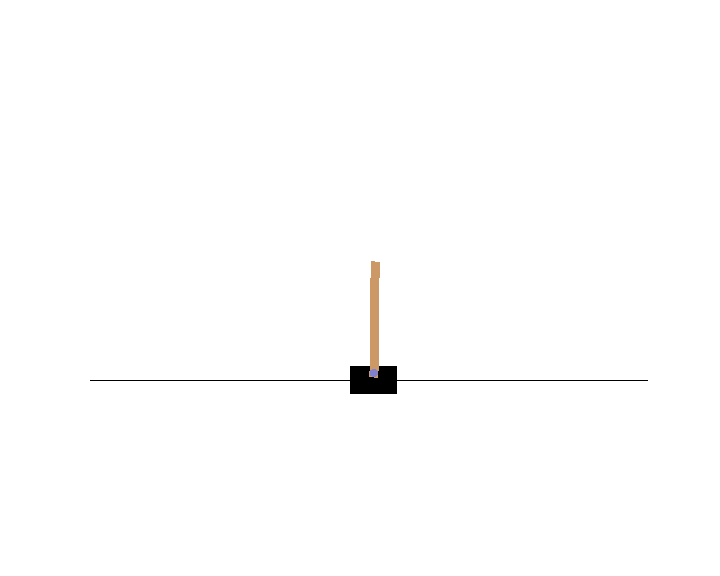
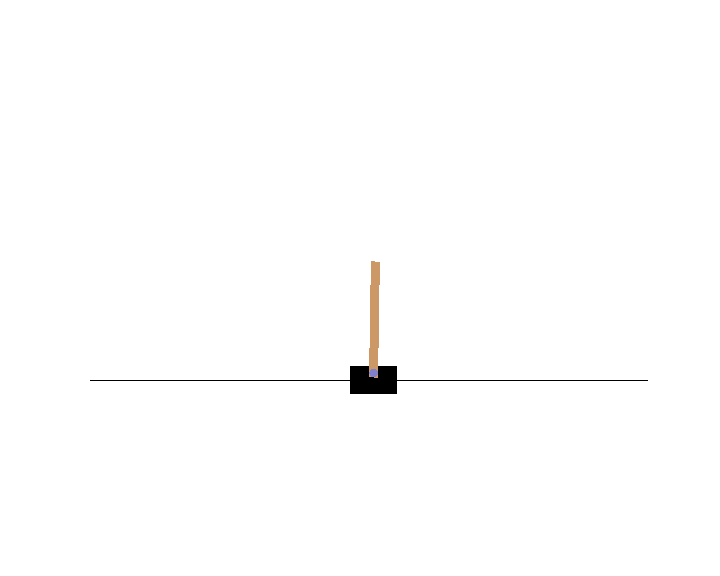
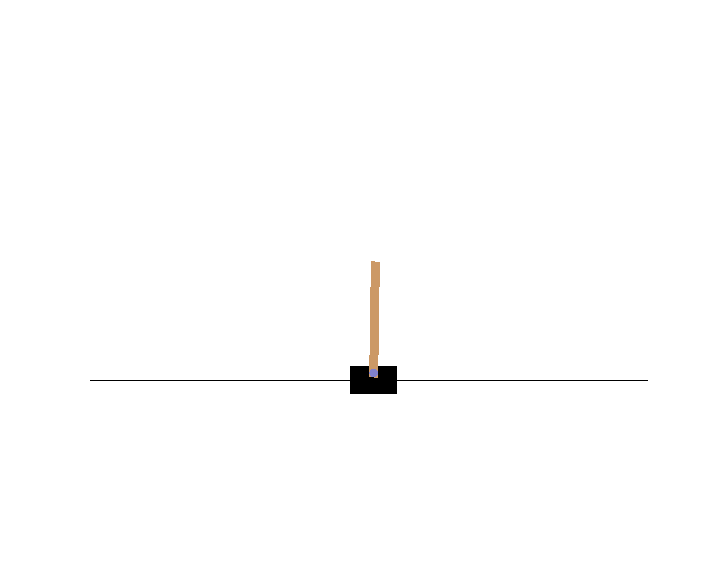
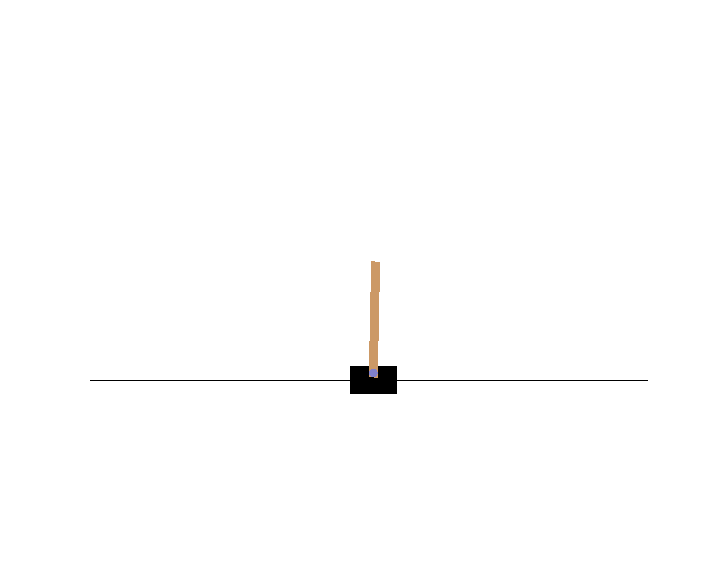
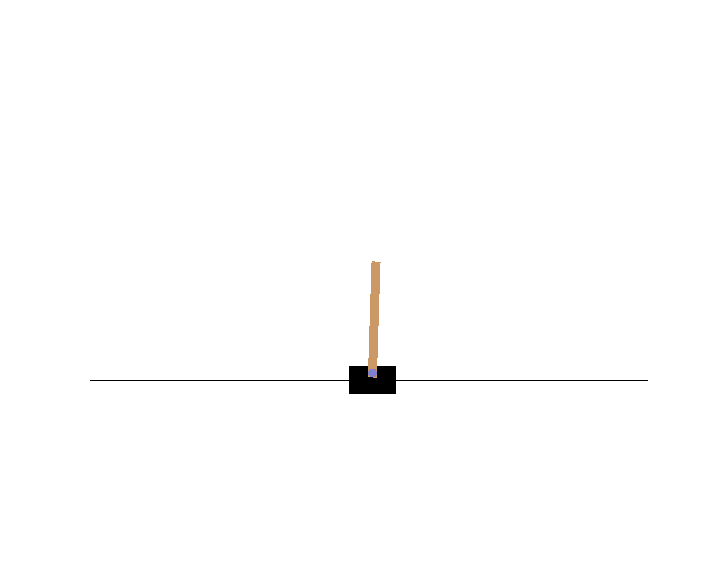
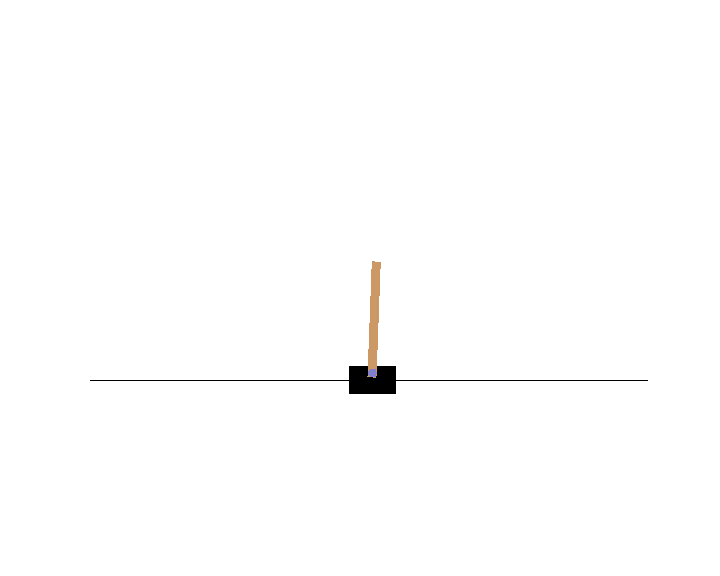
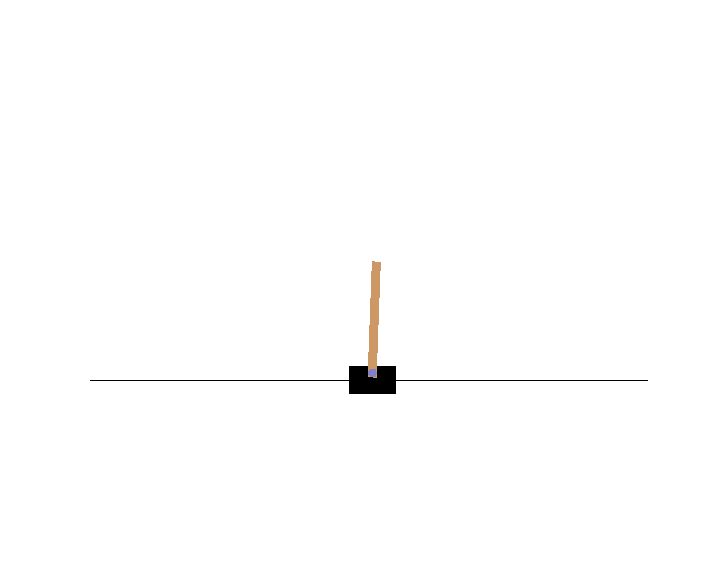
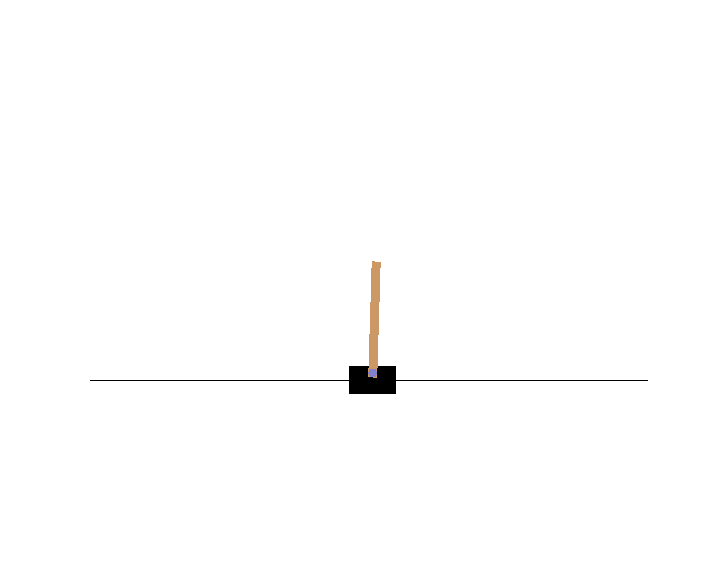
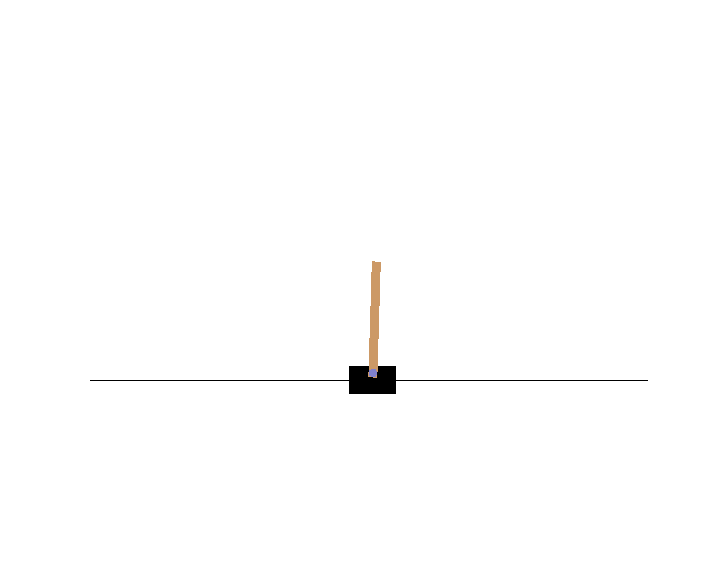
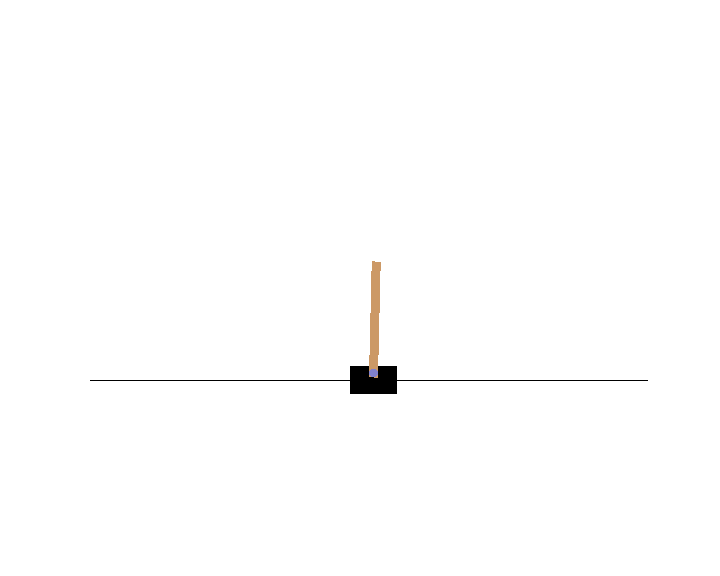
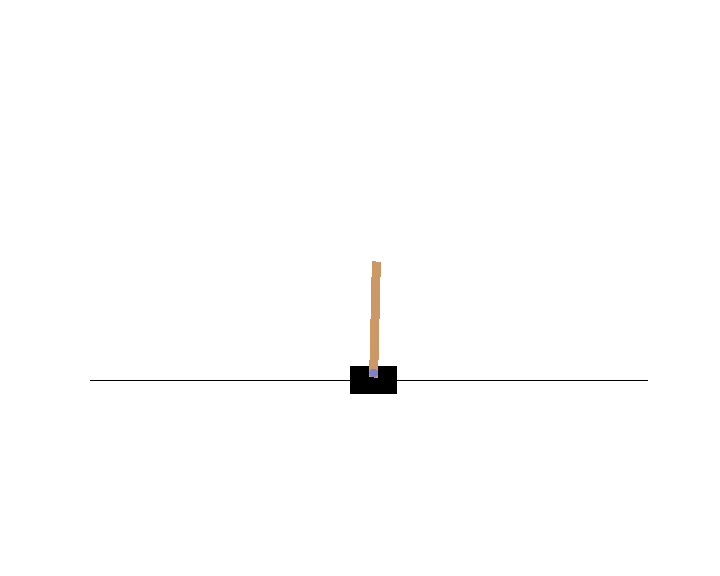
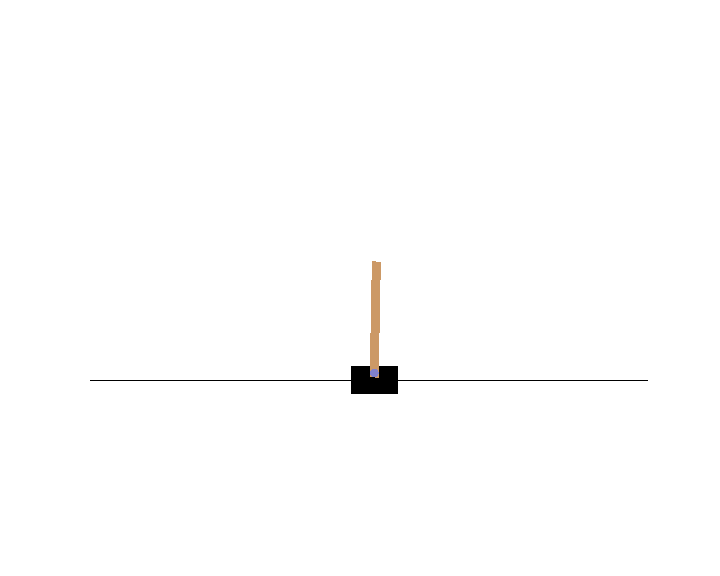
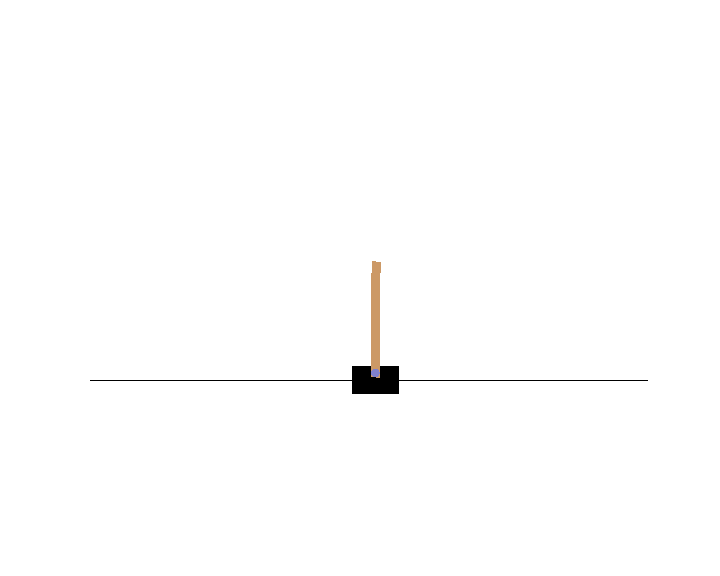
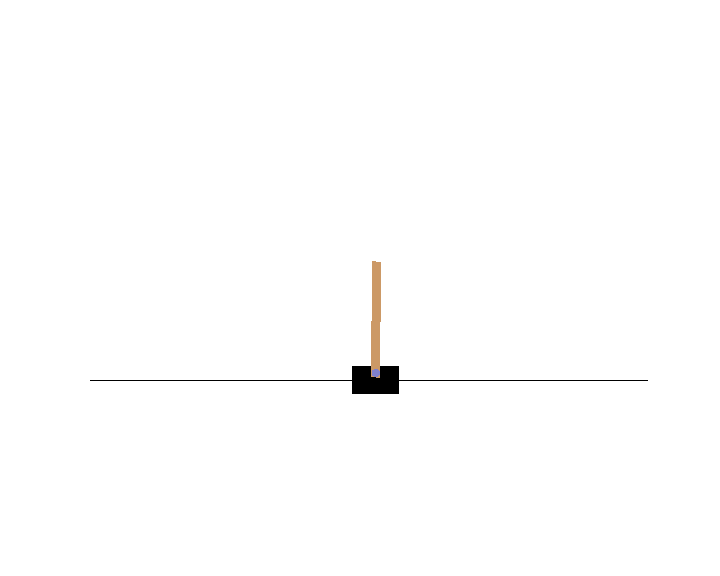
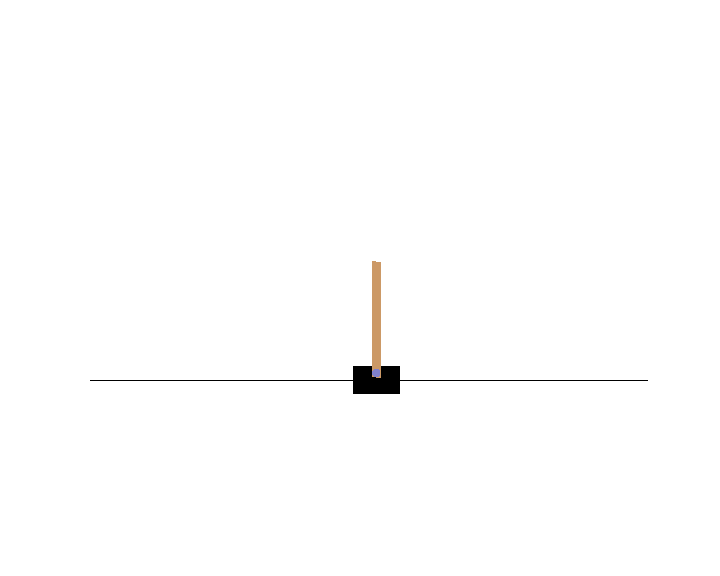
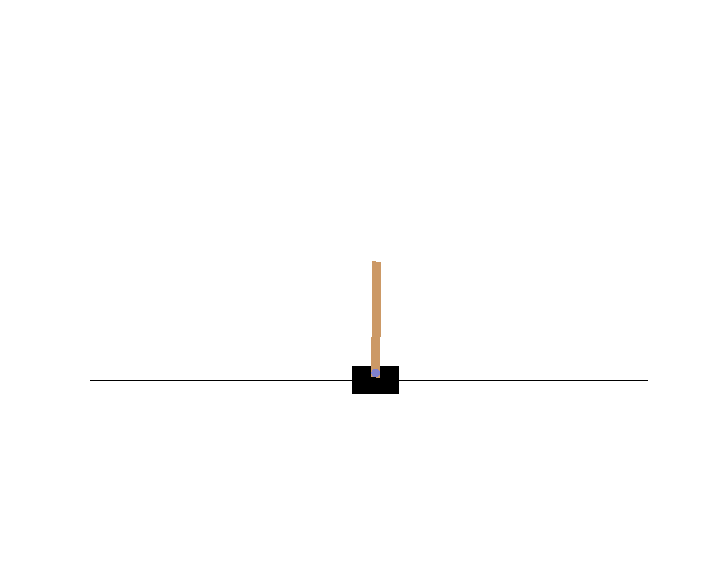
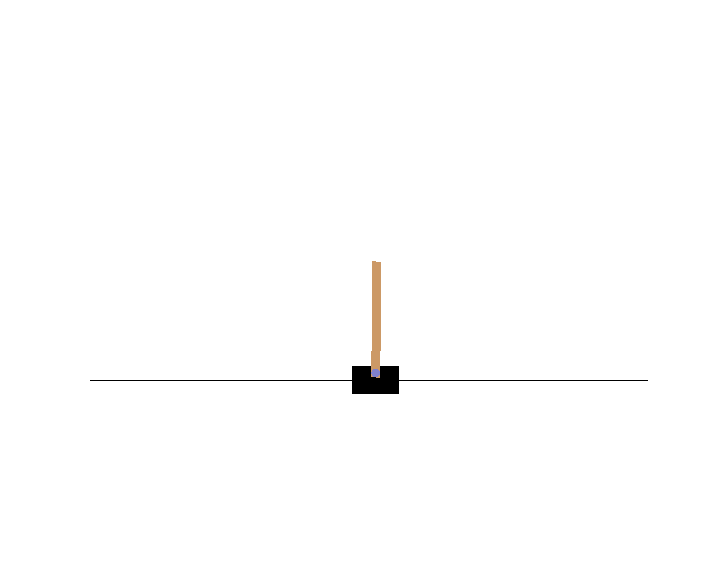
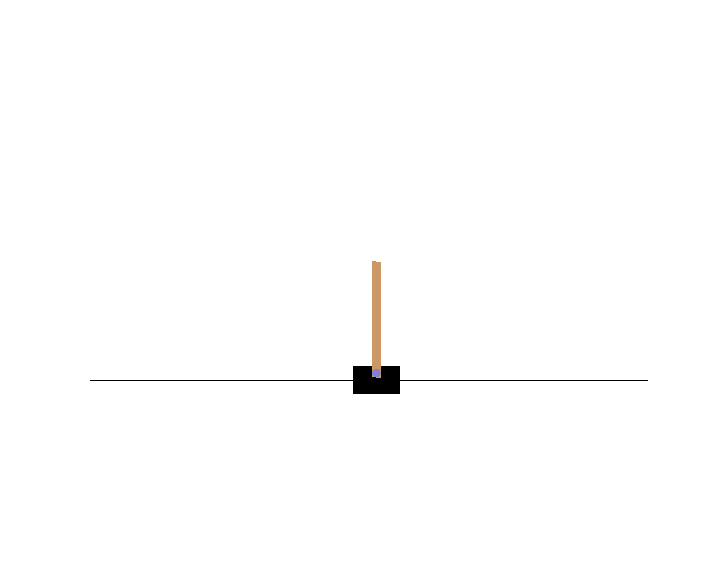
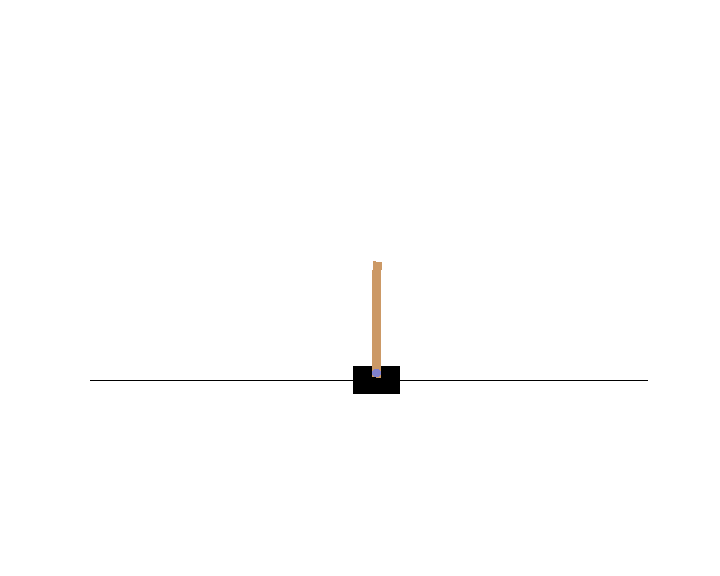
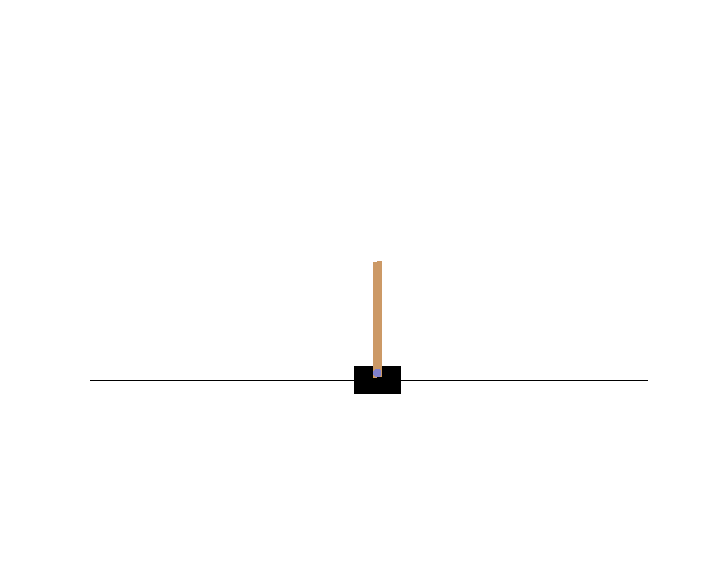
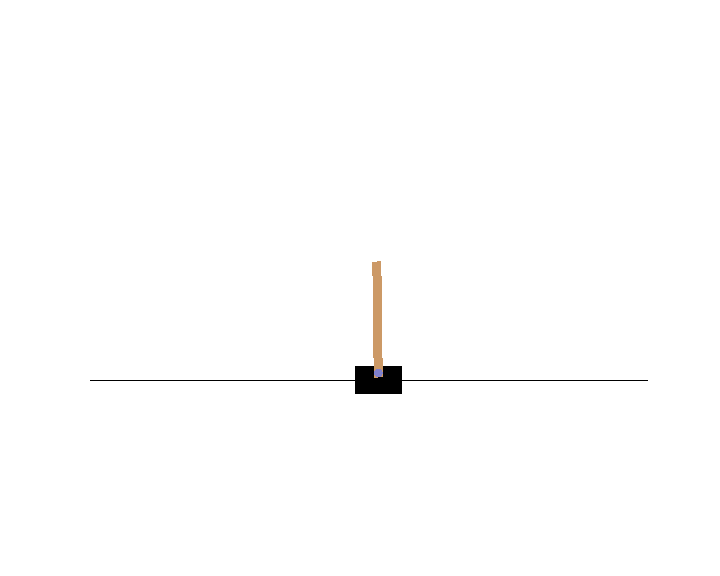
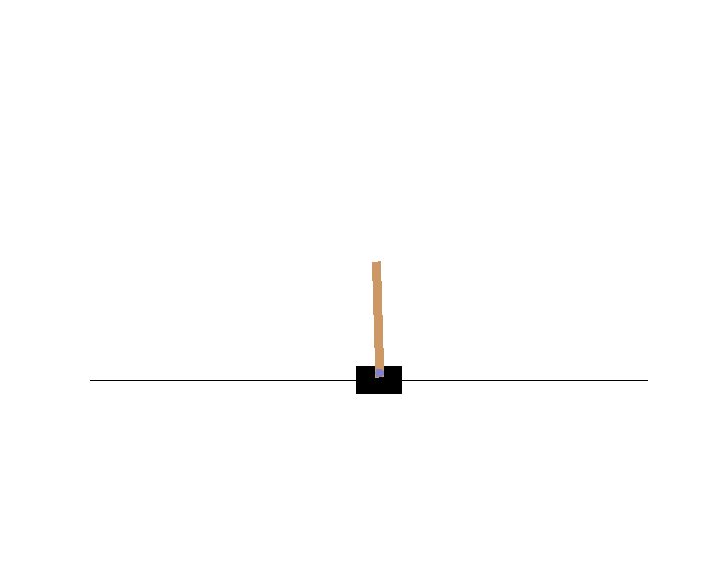
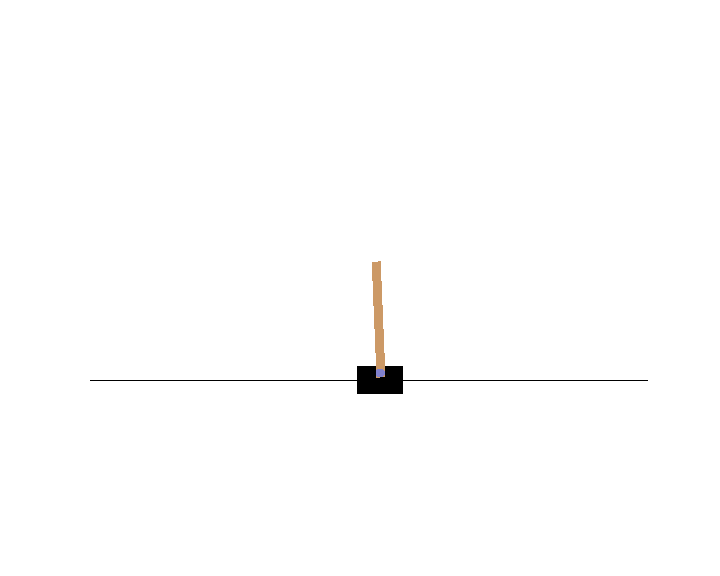
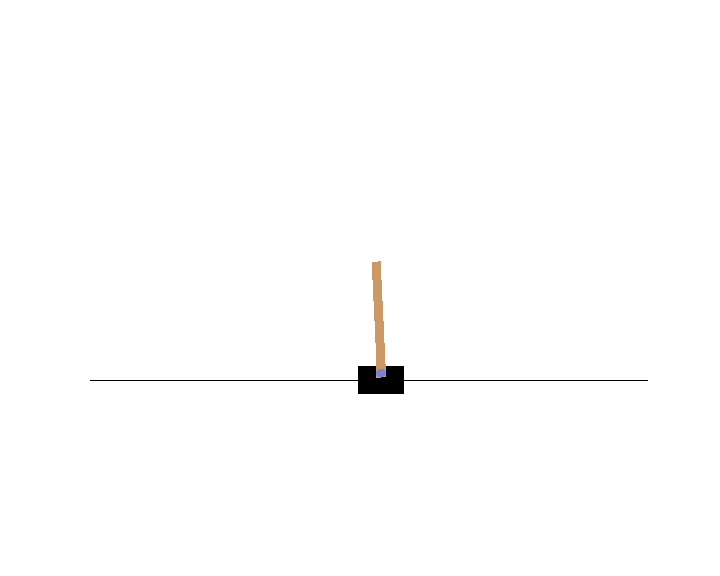
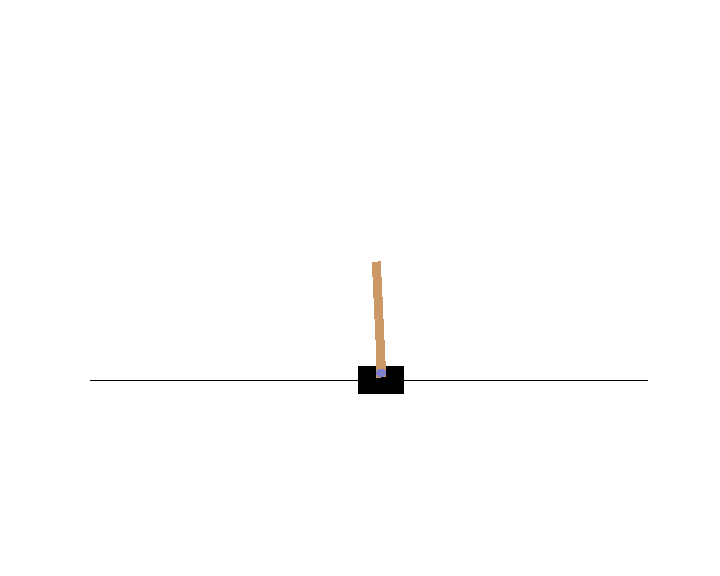
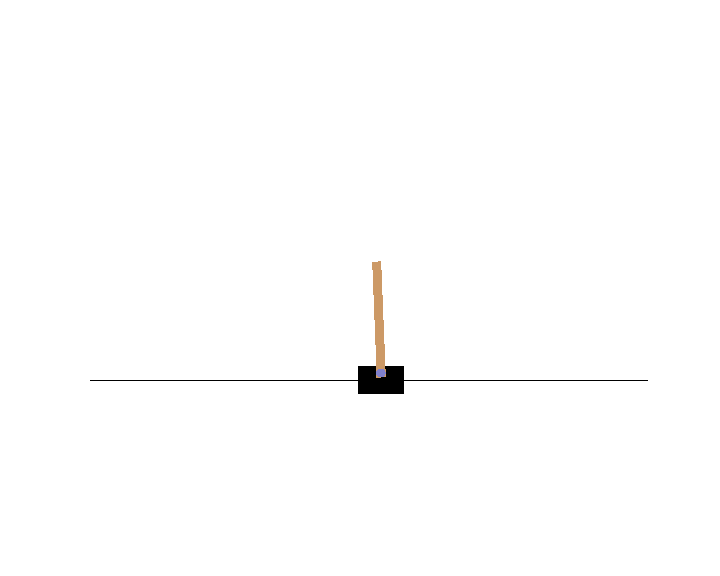
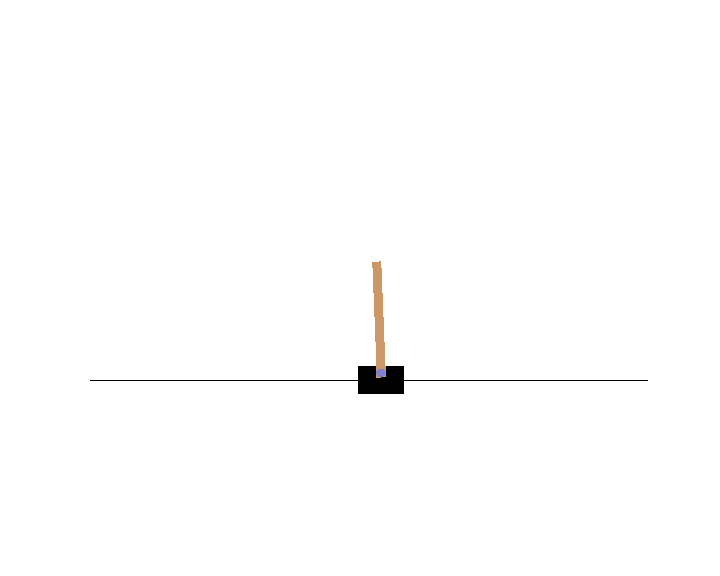
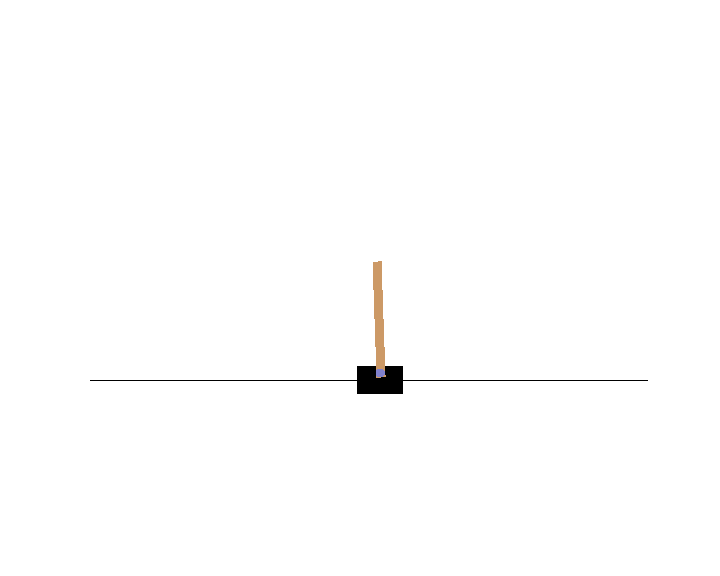
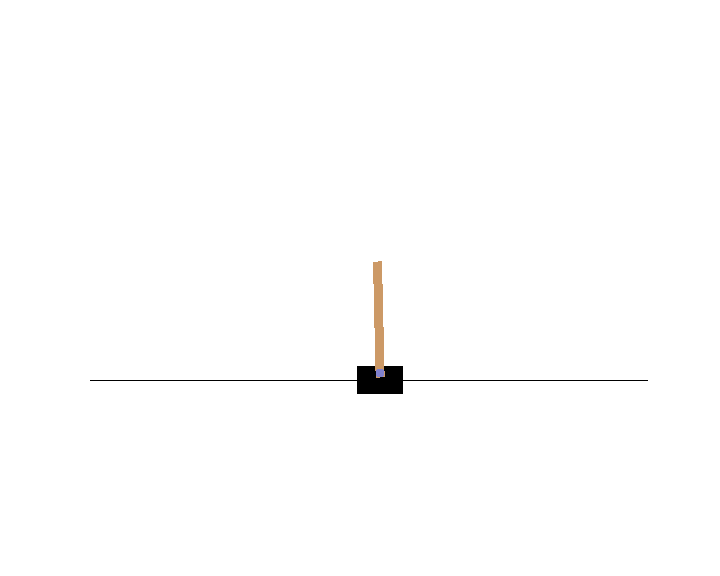
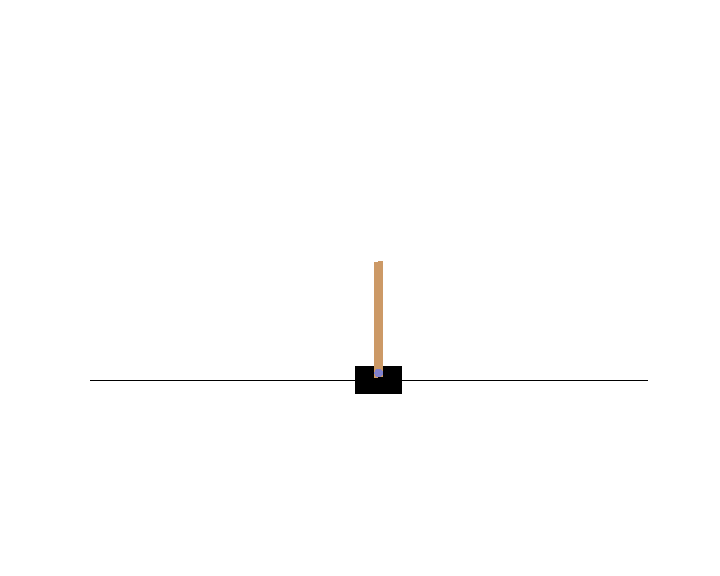
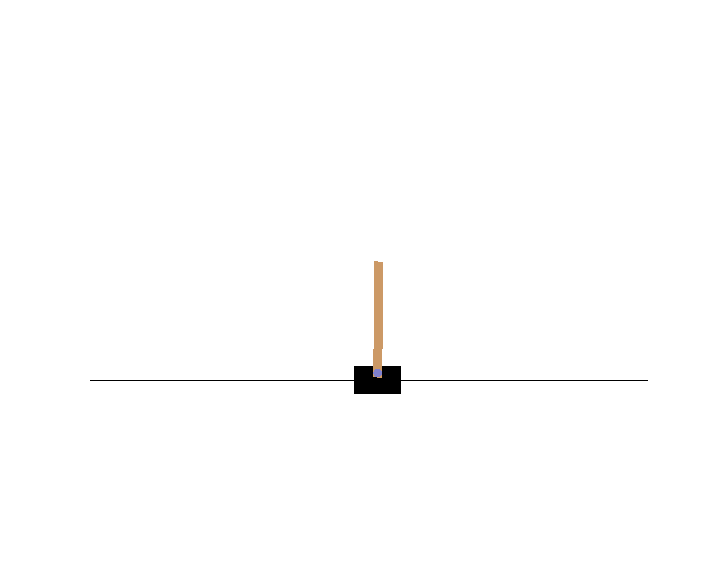
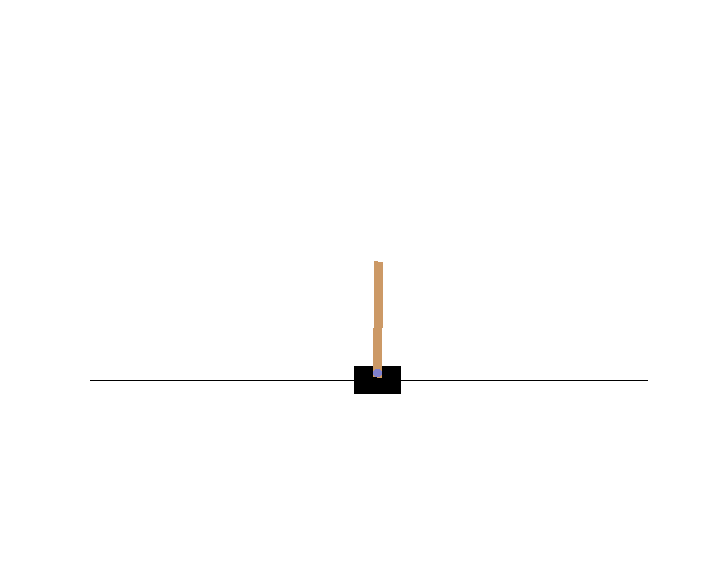
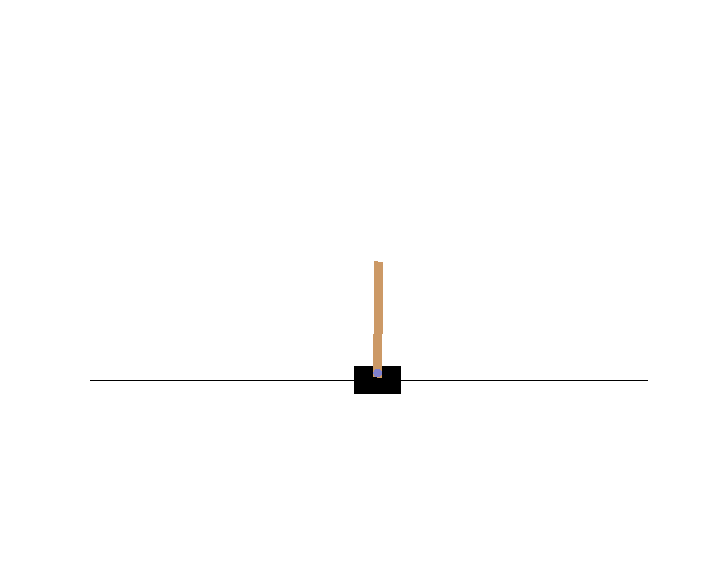
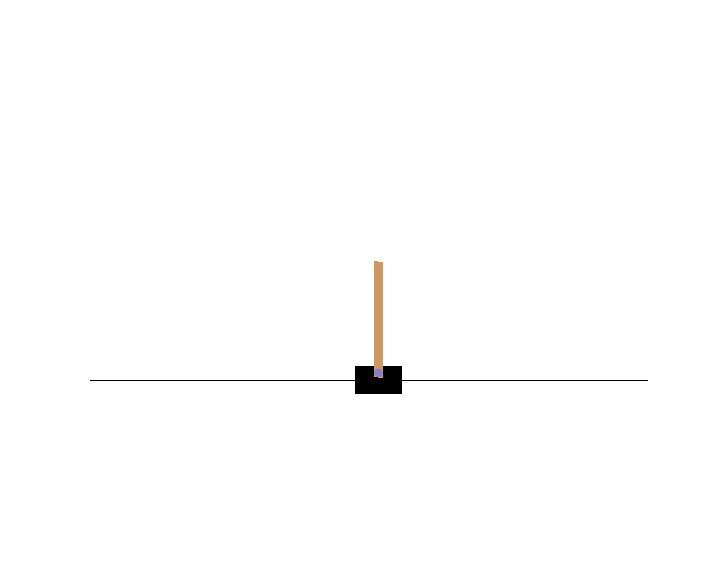
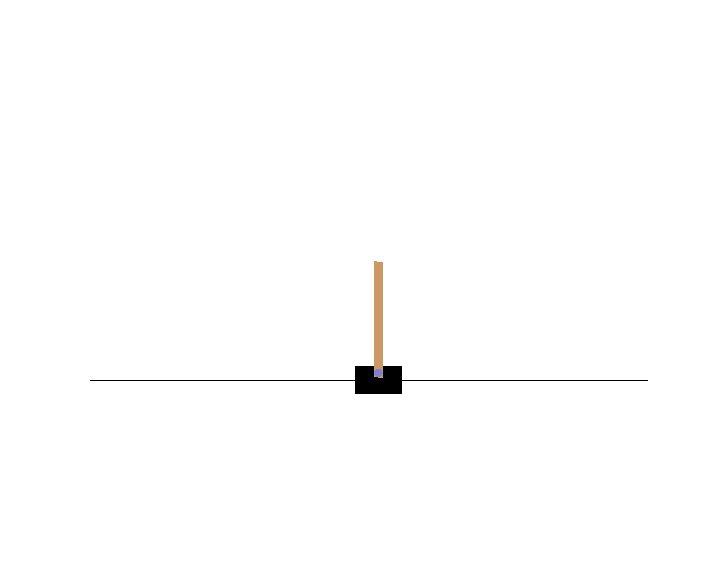
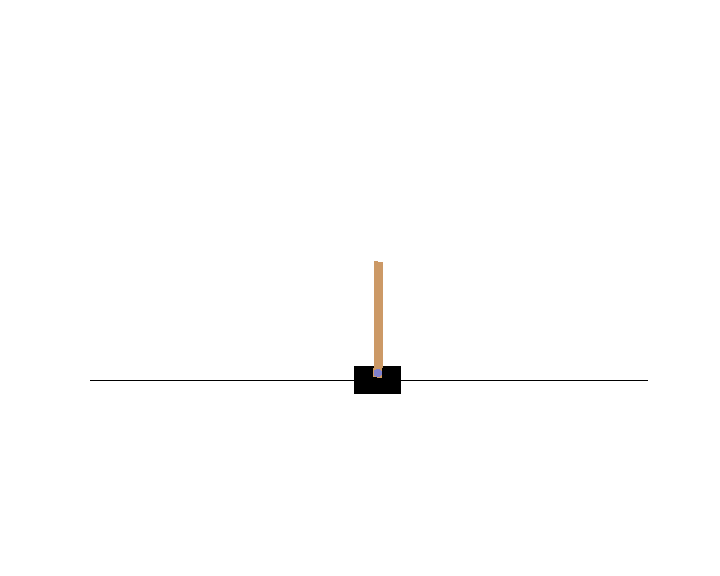
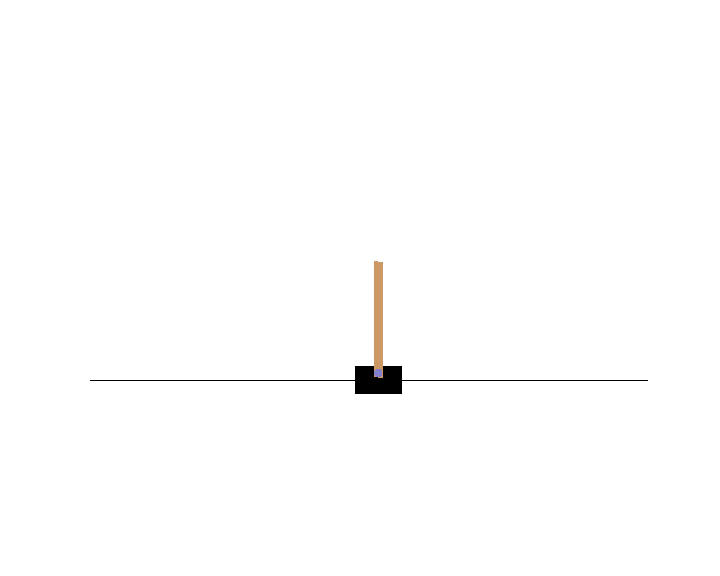
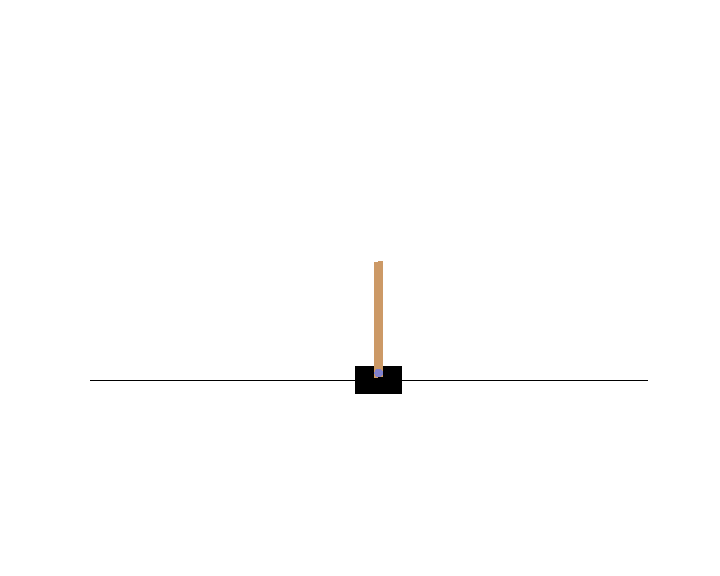
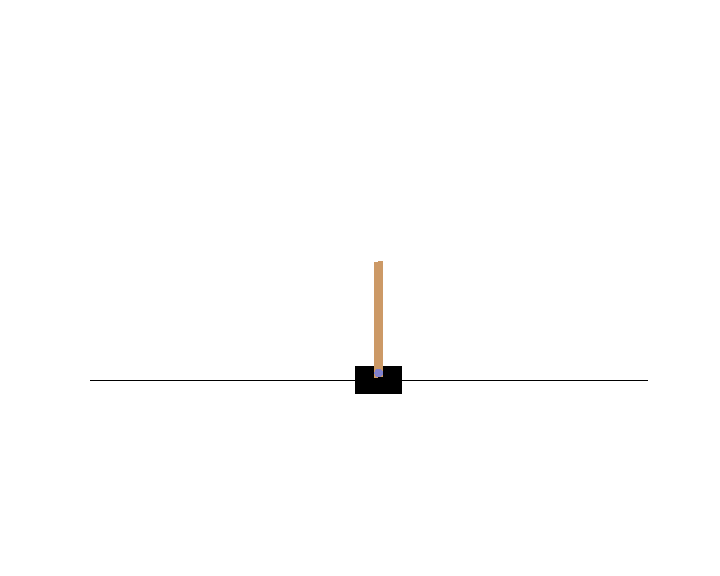
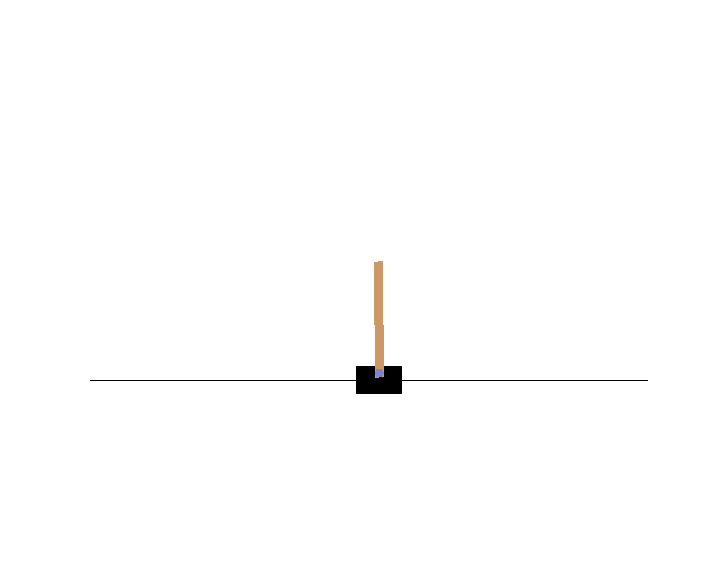
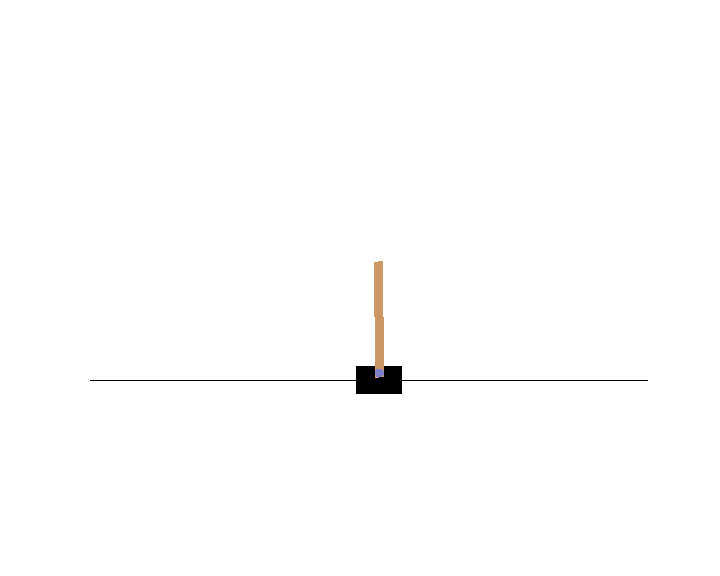
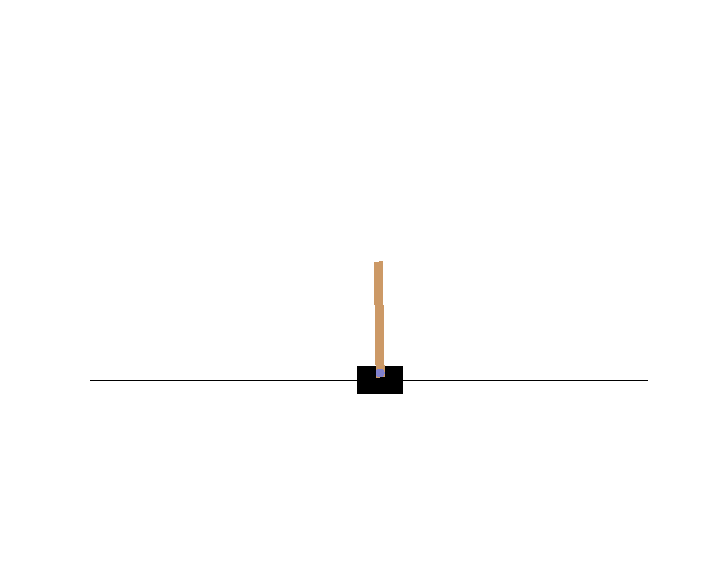
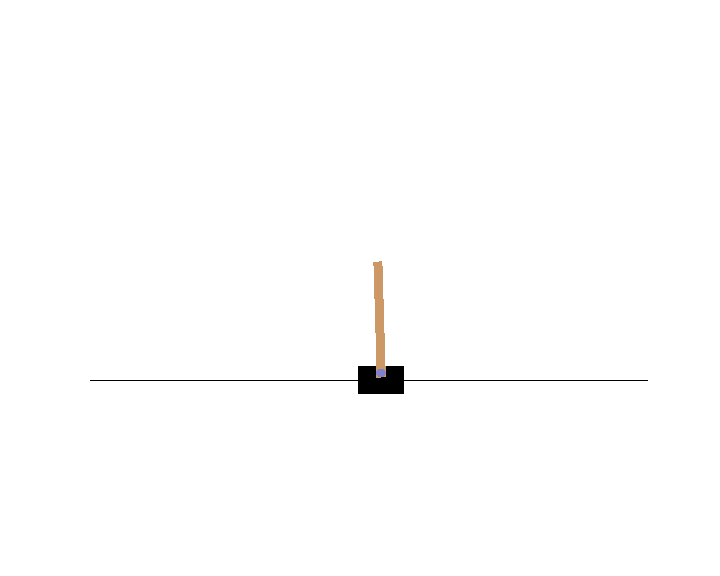
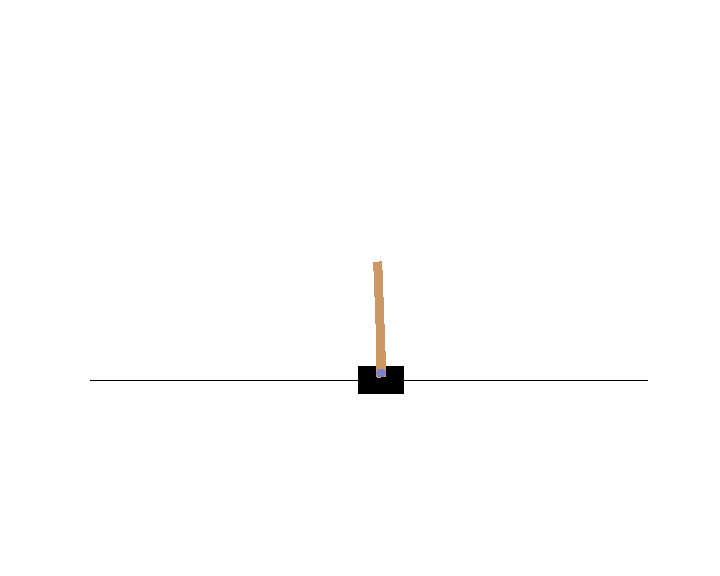
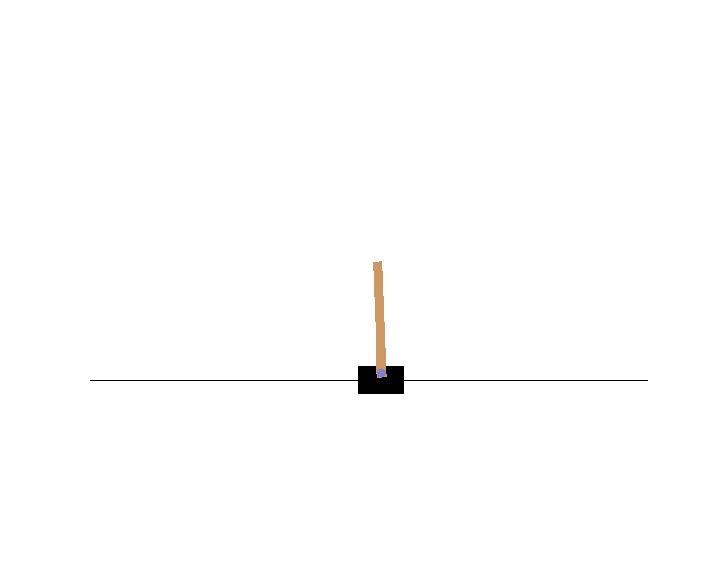
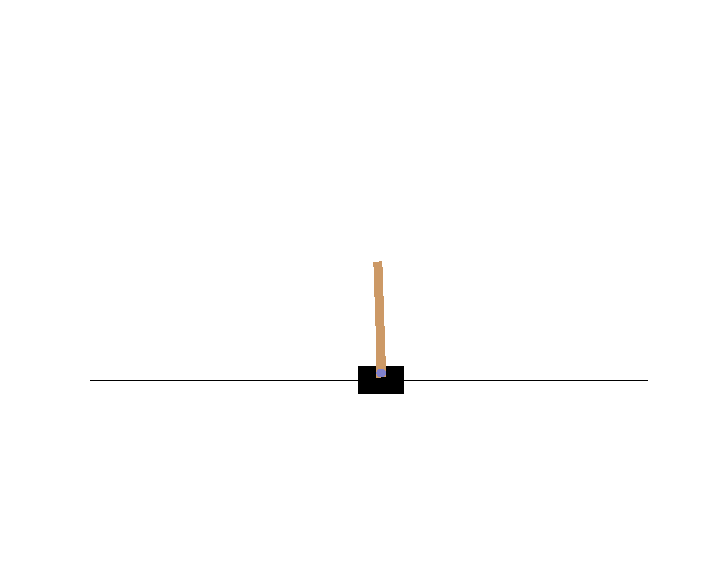
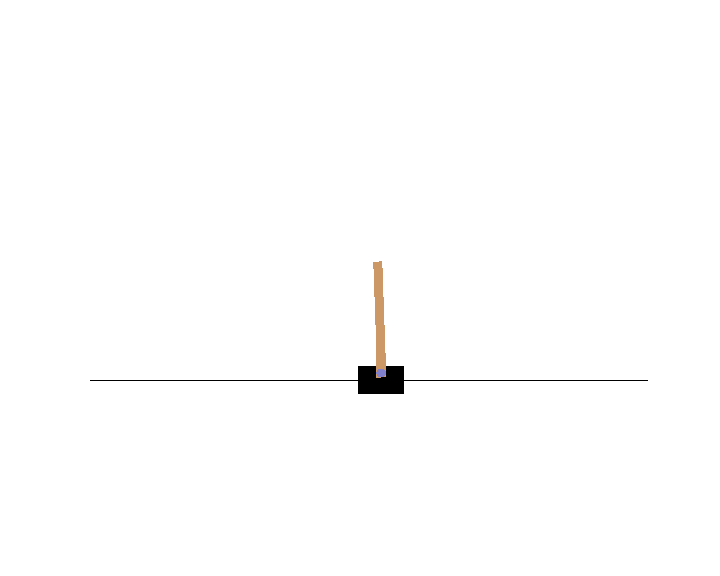
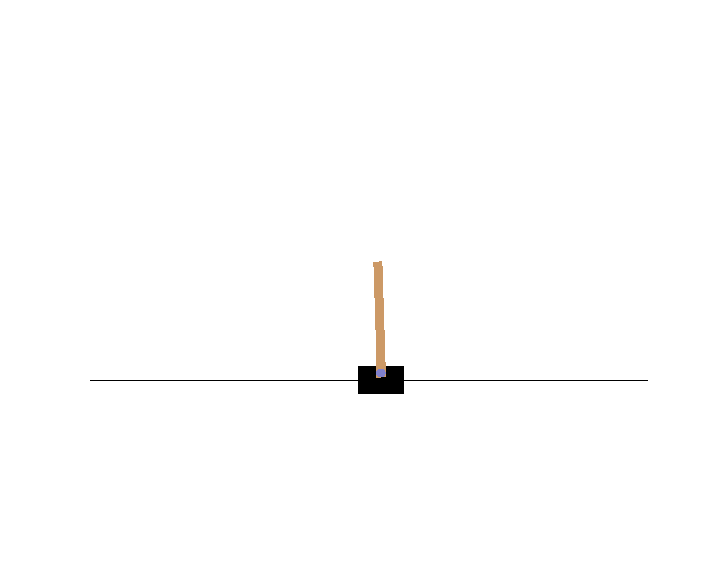
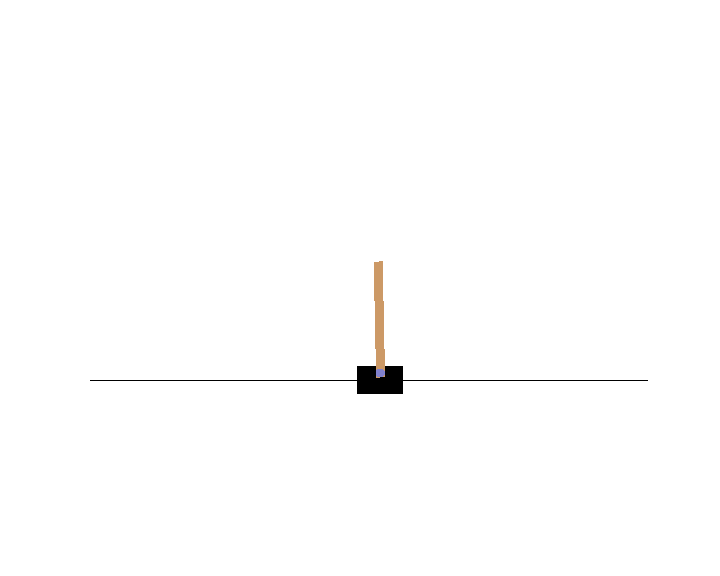
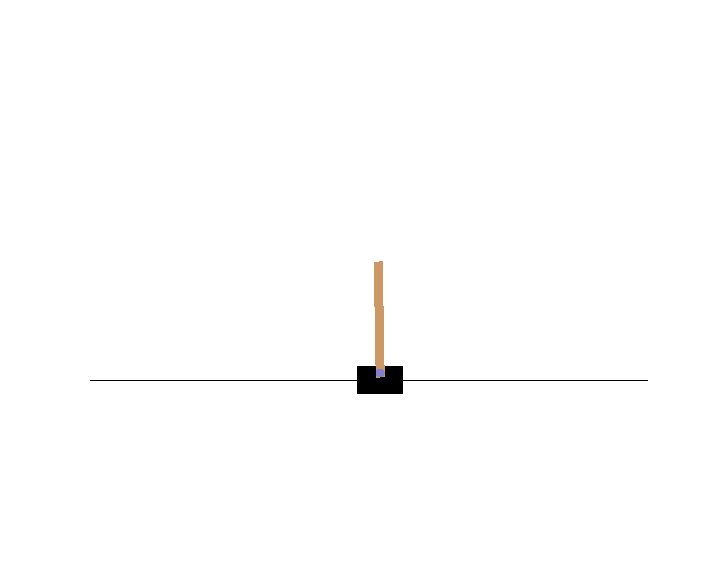
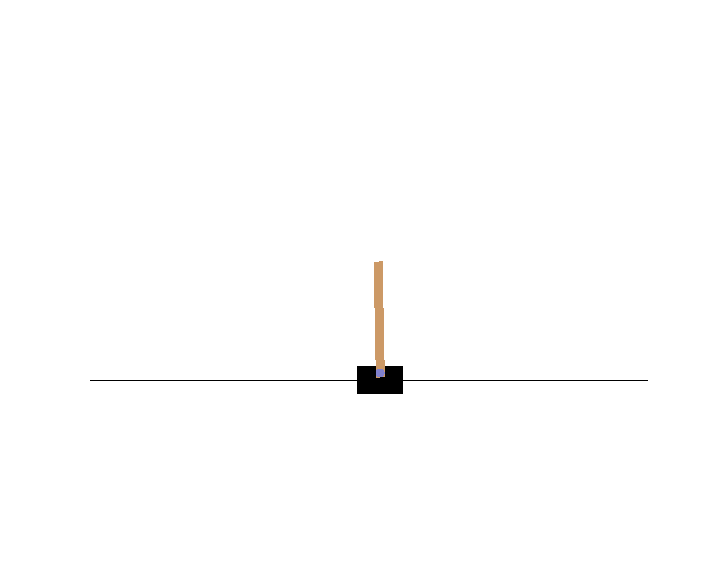
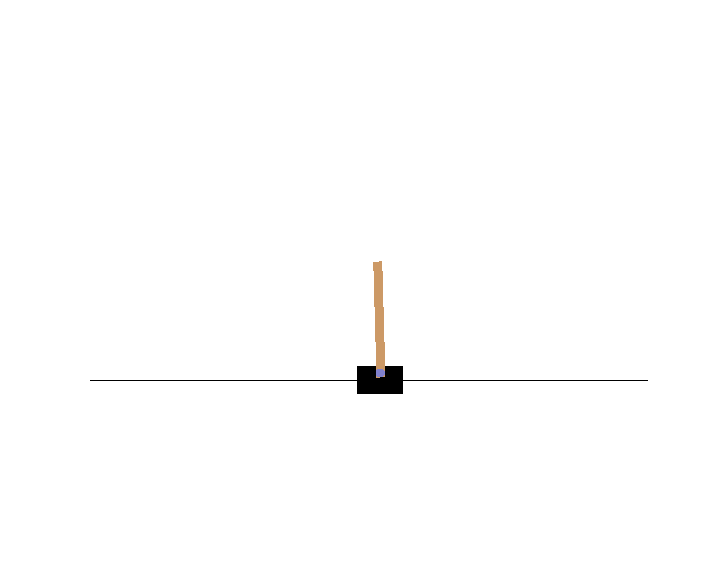

In [32]:

display_frames_as_gif(frames)